In [2]:
import pandas as pd
import plotly.express as px


## Data Prior to Extreme Value Removal

In [3]:
data = pd.read_parquet('../data/processed/bpeace2-beacon_with_extreme.parquet')

In [9]:
data

TVOC     eCO2  Lux  Visible  Infrared    NO2  T_NO2  \
Timestamp                                                                    
2020-06-08 00:00:00  537.88   990.12  0.0      0.0       0.0  74.64   28.0   
2020-06-08 00:05:00  537.70  1006.65  0.0      0.0       0.0  75.85   28.0   
2020-06-08 00:10:00  537.64  1020.24  0.0      0.0       0.0  76.56   28.0   
2020-06-08 00:15:00  542.40  1080.52  0.0      0.0       0.0  74.52   28.0   
2020-06-08 00:20:00  541.04  1093.04  0.0      0.0       0.0  74.92   28.0   
...                     ...      ...  ...      ...       ...    ...    ...   
2020-08-26 23:40:00     NaN      NaN  NaN      NaN       NaN    NaN    NaN   
2020-08-26 23:45:00     NaN      NaN  NaN      NaN       NaN    NaN    NaN   
2020-08-26 23:50:00     NaN      NaN  NaN      NaN       NaN    NaN    NaN   
2020-08-26 23:55:00     NaN      NaN  NaN      NaN       NaN    NaN    NaN   
2020-08-27 00:00:00     NaN      NaN  NaN      NaN       NaN    NaN    NaN   

                     RH_NO2       CO  T_CO  ...     PM_N_4    PM_N_10  \
Timestamp                                   ...                         
2020-06-08 00:00:00   36.80 -0.68488  28.0  ...  39.961129  40.164481   
2020-06-08 00:05:00   37.00 -0.52275  28.0  ...  32.546536  32.691019   
2020-06-08 00:10:00   37.00 -0.78328  28.0  ...  34.809603  34.927838   
2020-06-08 00:15:00   36.28 -0.83856  28.0  ...  40.619122  40.779581   
2020-06-08 00:20:00   36.40 -0.48872  28.0  ...  37.065600  37.242149   
...                     ...      ...   ...  ...        ...        ...   
2020-08-26 23:40:00     NaN      NaN   NaN  ...        NaN        NaN   
2020-08-26 23:45:00     NaN      NaN   NaN  ...        NaN        NaN   
2020-08-26 23:50:00     NaN      NaN   NaN  ...        NaN        NaN   
2020-08-26 23:55:00     NaN      NaN   NaN  ...        NaN        NaN   
2020-08-27 00:00:00     NaN      NaN   NaN  ...        NaN        NaN   

                       PM_C_1   PM_C_2p5     PM_C_4    PM_C_10  Beacon  \
Timestamp                                                                
2020-06-08 00:00:00  4.925515  11.135812  15.932873  16.892285       1   
2020-06-08 00:05:00  4.020243   8.442126  11.833886  12.512238       1   
2020-06-08 00:10:00  4.314605   7.951792  10.694790  11.243390       1   
2020-06-08 00:15:00  5.025503   9.946487  13.695432  14.445220       1   
2020-06-08 00:20:00  4.573548   9.970680  14.125998  14.957063       1   
...                       ...        ...        ...        ...     ...   
2020-08-26 23:40:00       NaN        NaN        NaN        NaN      46   
2020-08-26 23:45:00       NaN        NaN        NaN        NaN      46   
2020-08-26 23:50:00       NaN        NaN        NaN        NaN      46   
2020-08-26 23:55:00       NaN        NaN        NaN        NaN      46   
2020-08-27 00:00:00       NaN        NaN        NaN        NaN      46   

                        Beiwe  Fitbit  REDCap  
Timestamp                                      
2020-06-08 00:00:00  kyj367pi      24      10  
2020-06-08 00:05:00  kyj367pi      24      10  
2020-06-08 00:10:00  kyj367pi      24      10  
2020-06-08 00:15:00  kyj367pi      24      10  
2020-06-08 00:20:00  kyj367pi      24      10  
...                       ...     ...     ...  
2020-08-26 23:40:00  nvtfpaor       7      33  
2020-08-26 23:45:00  nvtfpaor       7      33  
2020-08-26 23:50:00  nvtfpaor       7      33  
2020-08-26 23:55:00  nvtfpaor       7      33  
2020-08-27 00:00:00  nvtfpaor       7      33  

[520667 rows x 27 columns]

### Line Plot

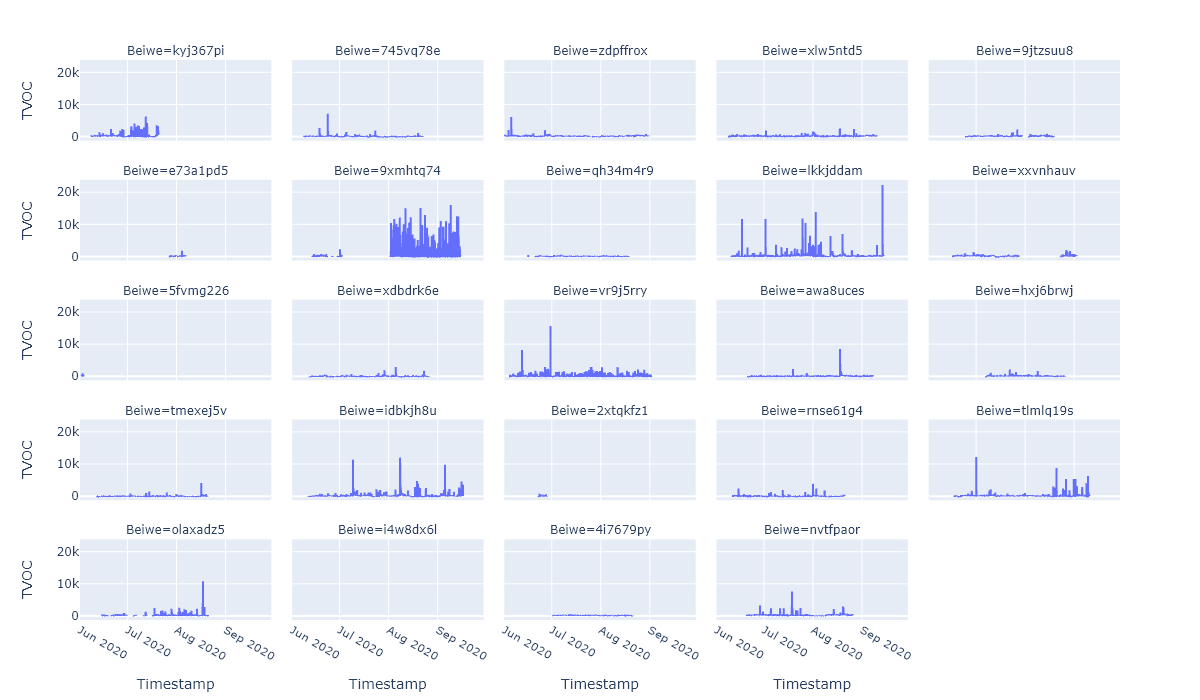

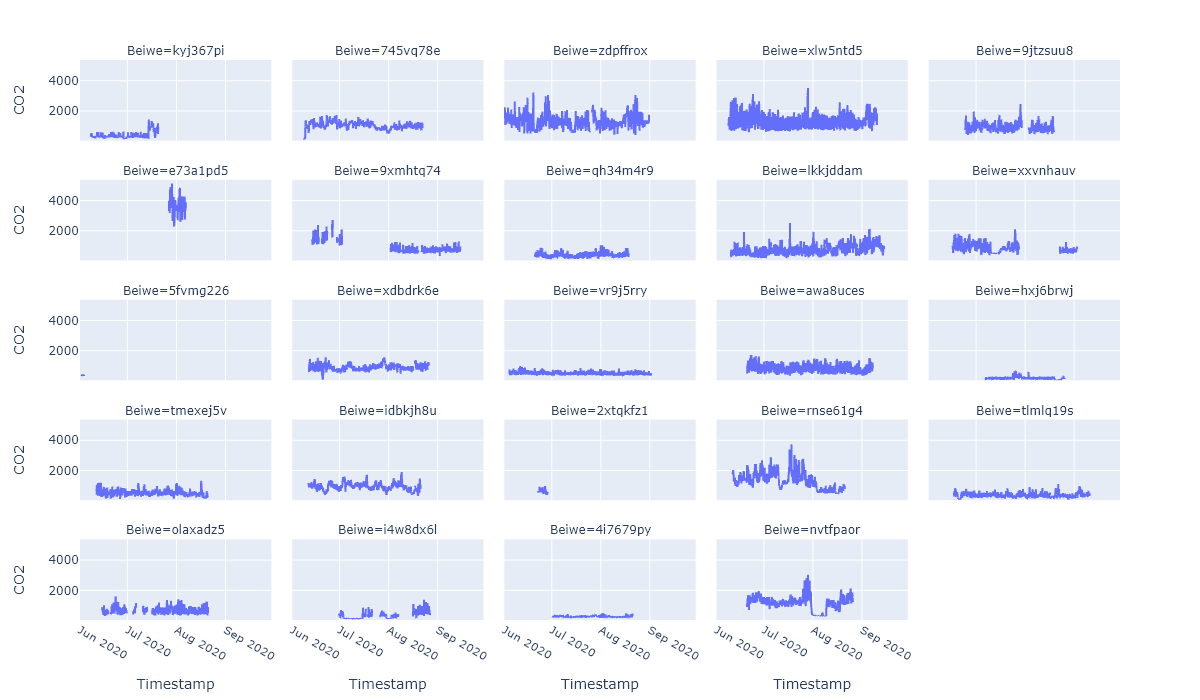

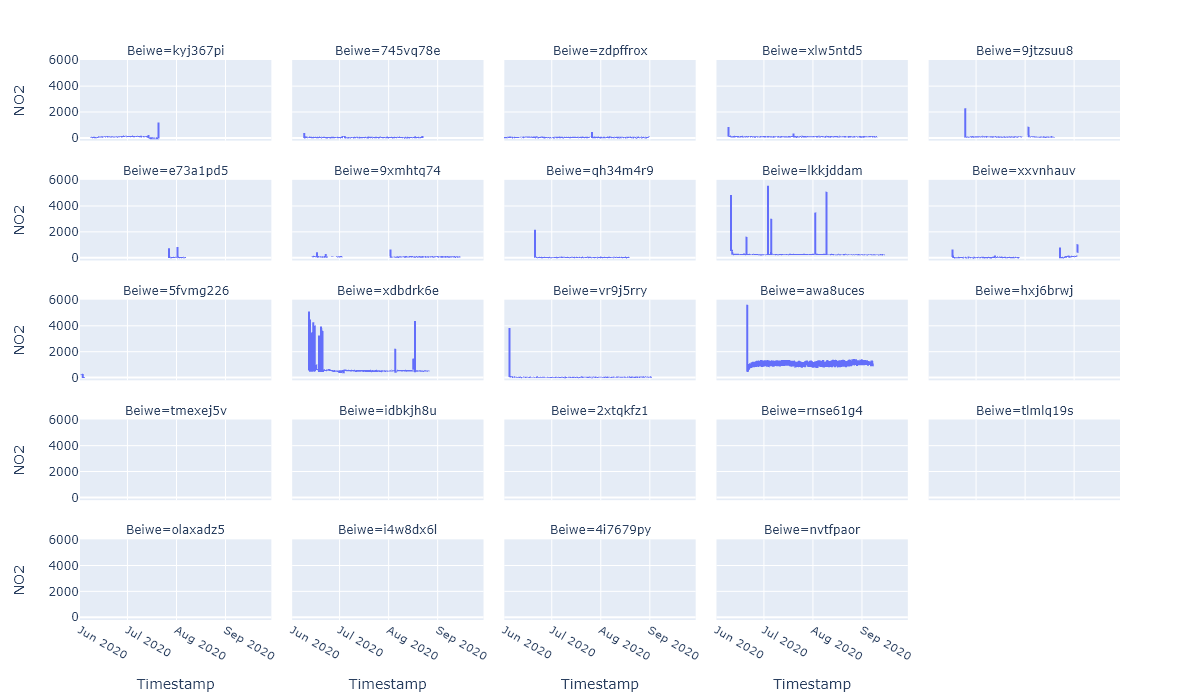

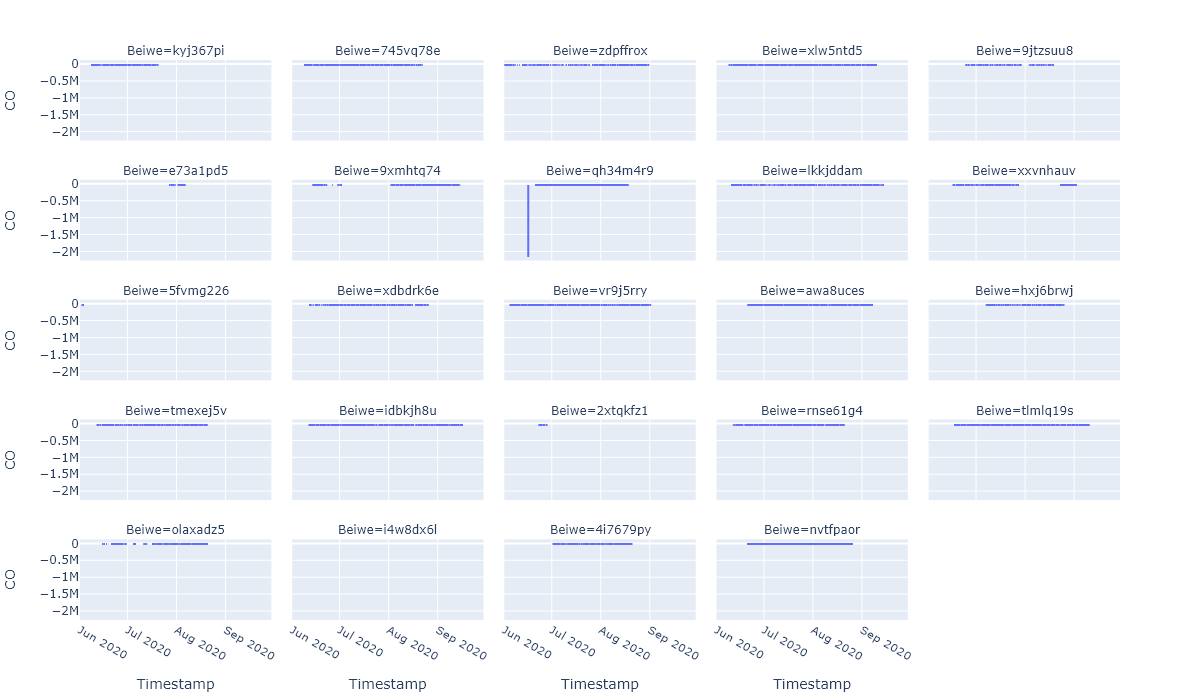

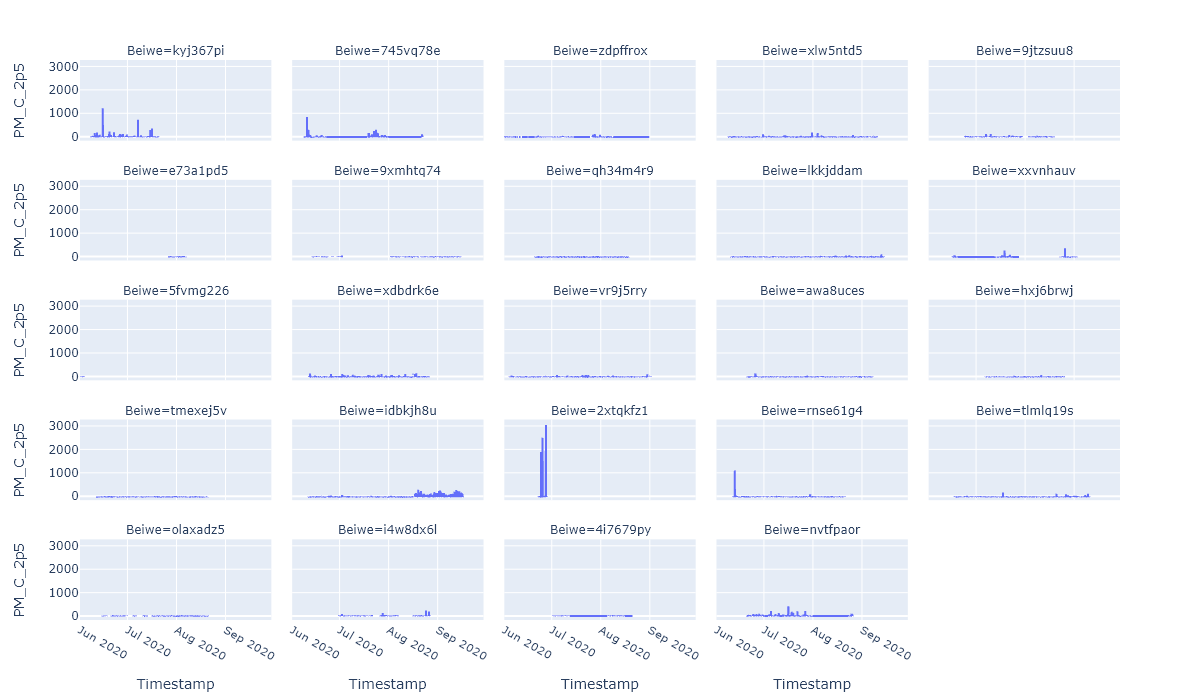

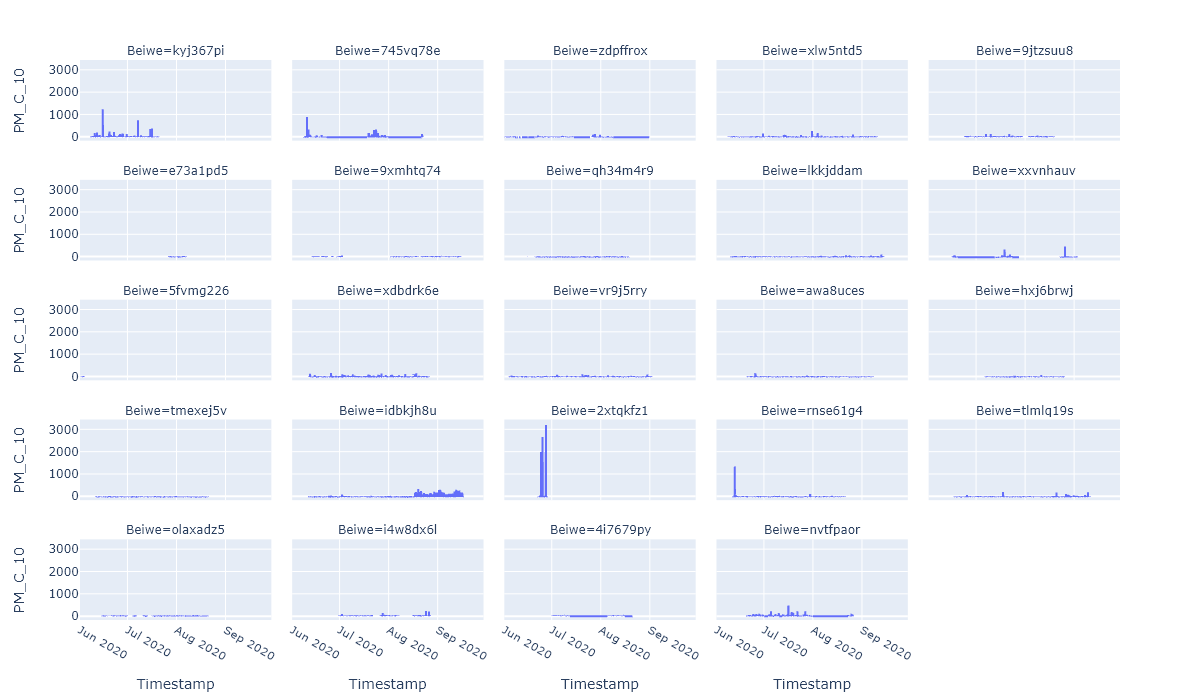

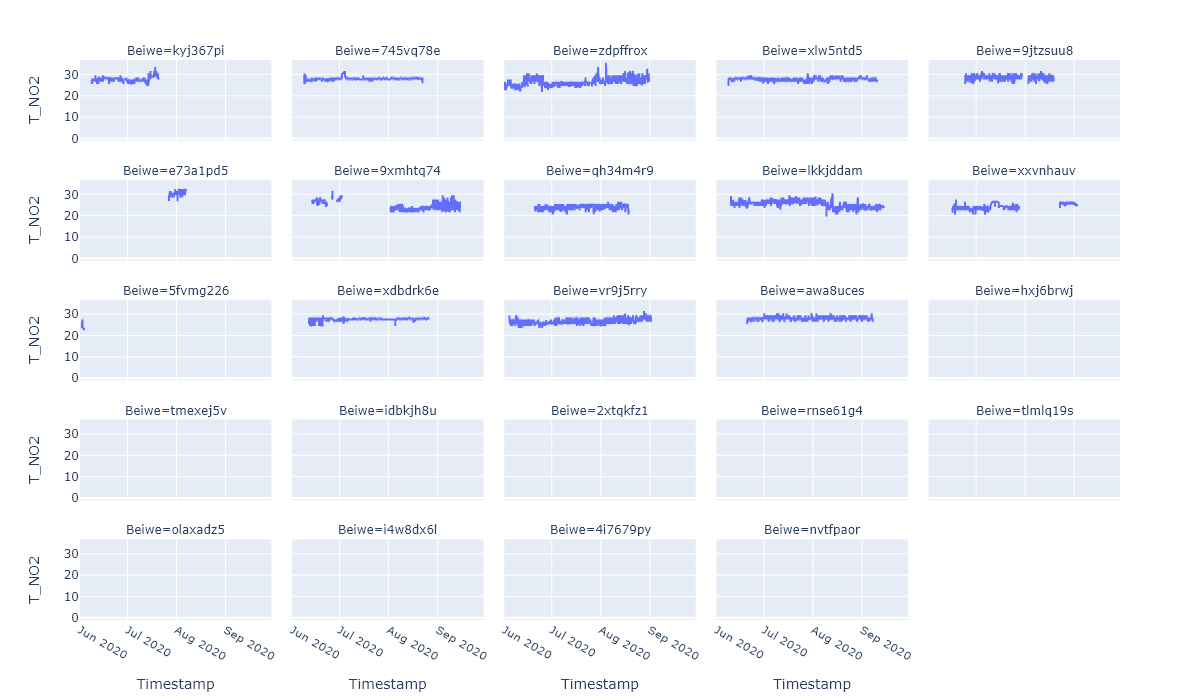

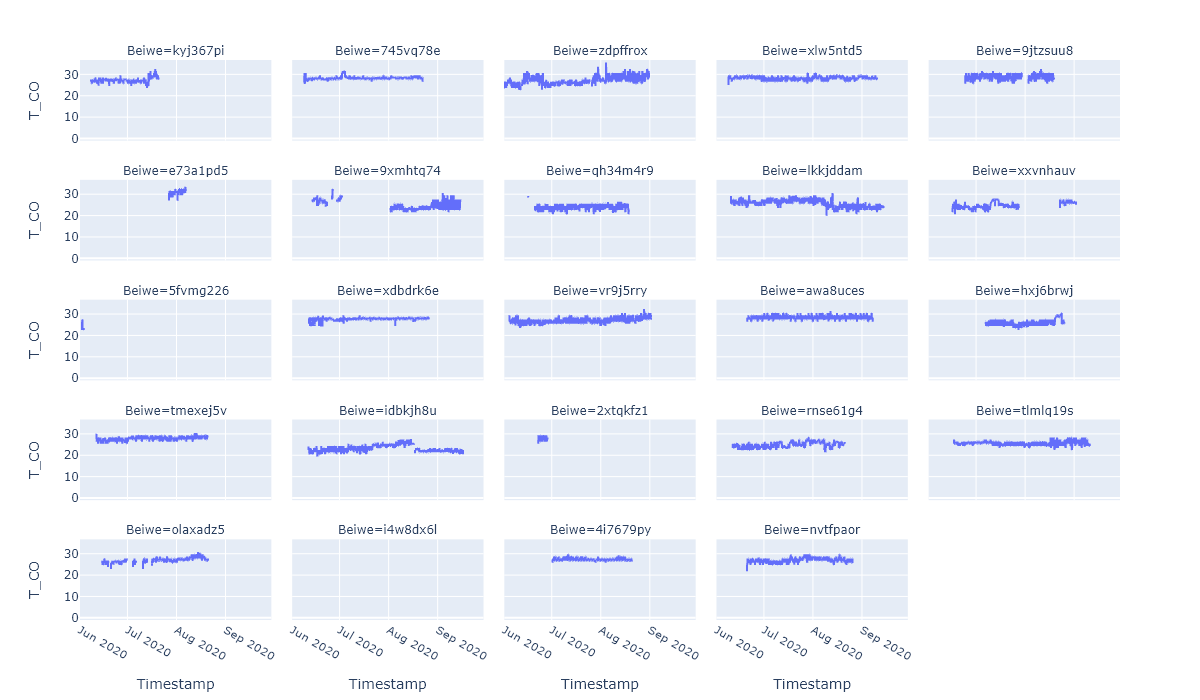

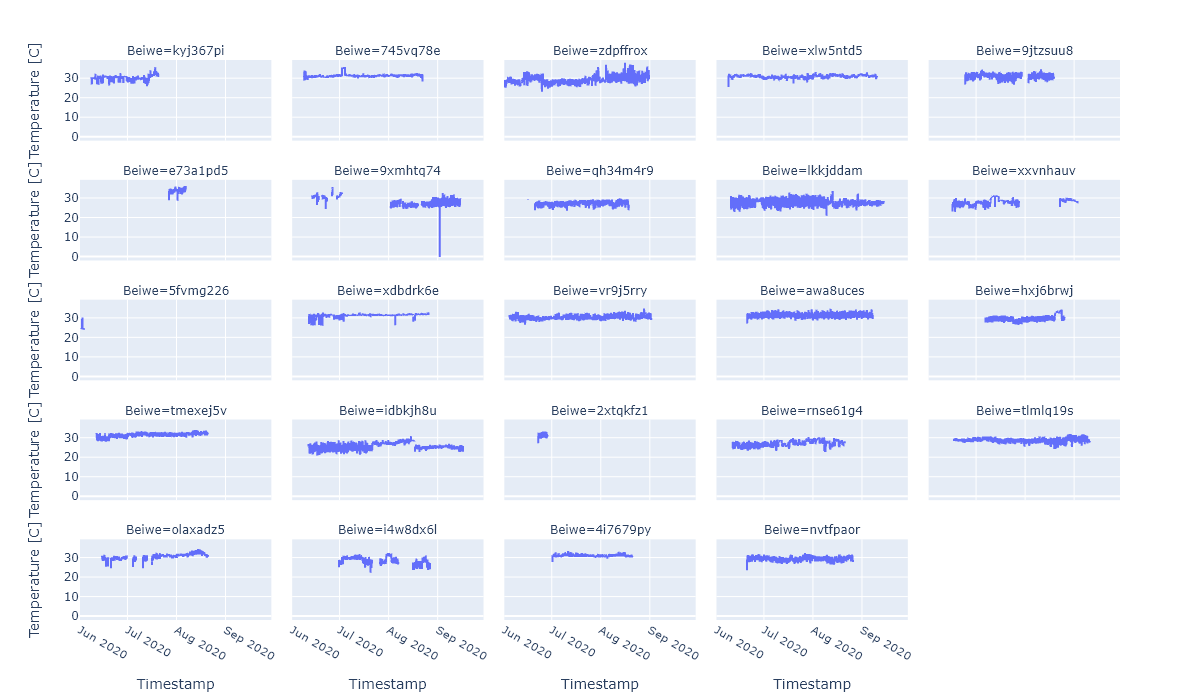

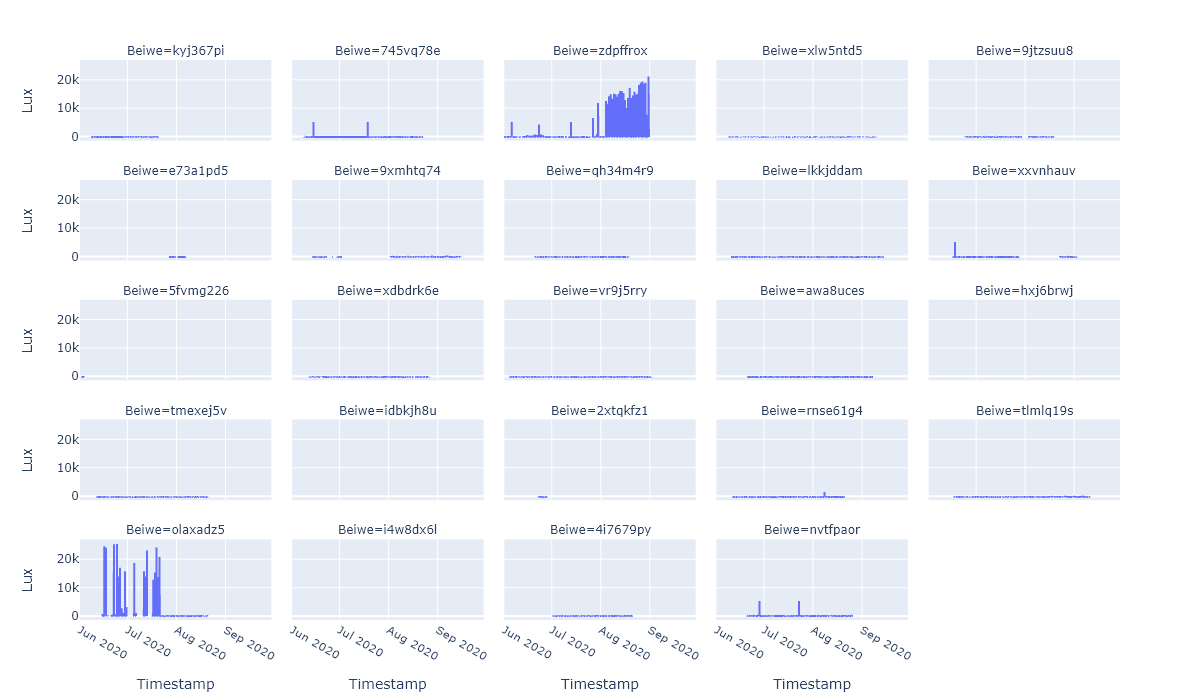

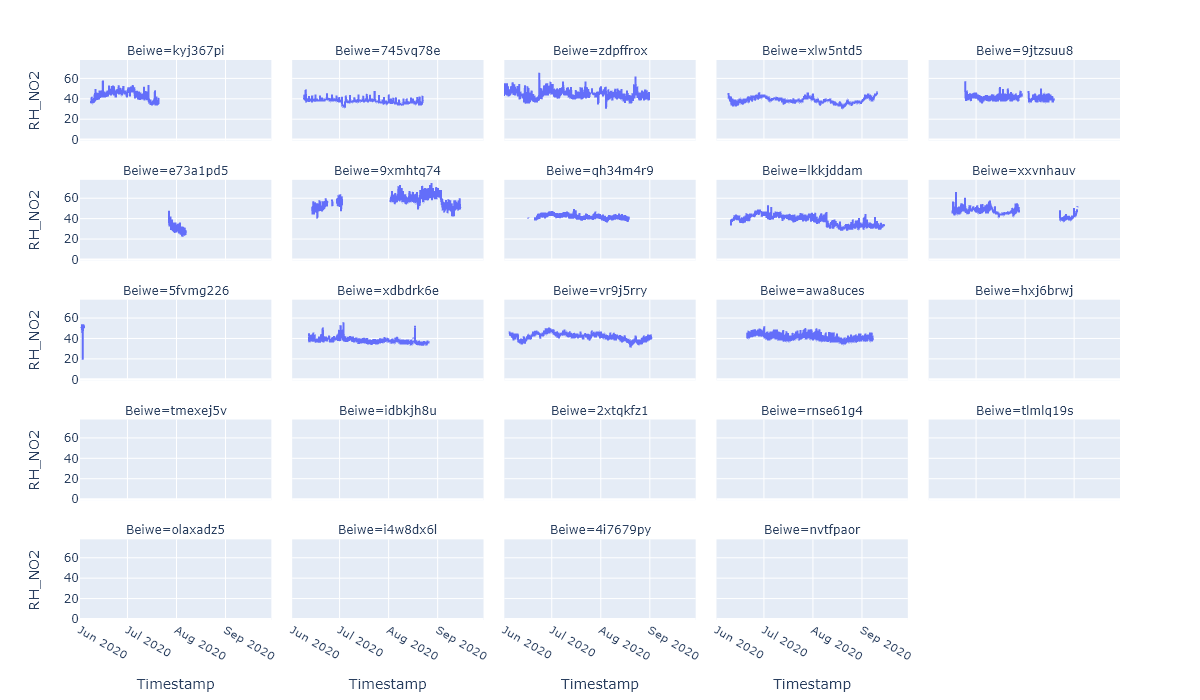

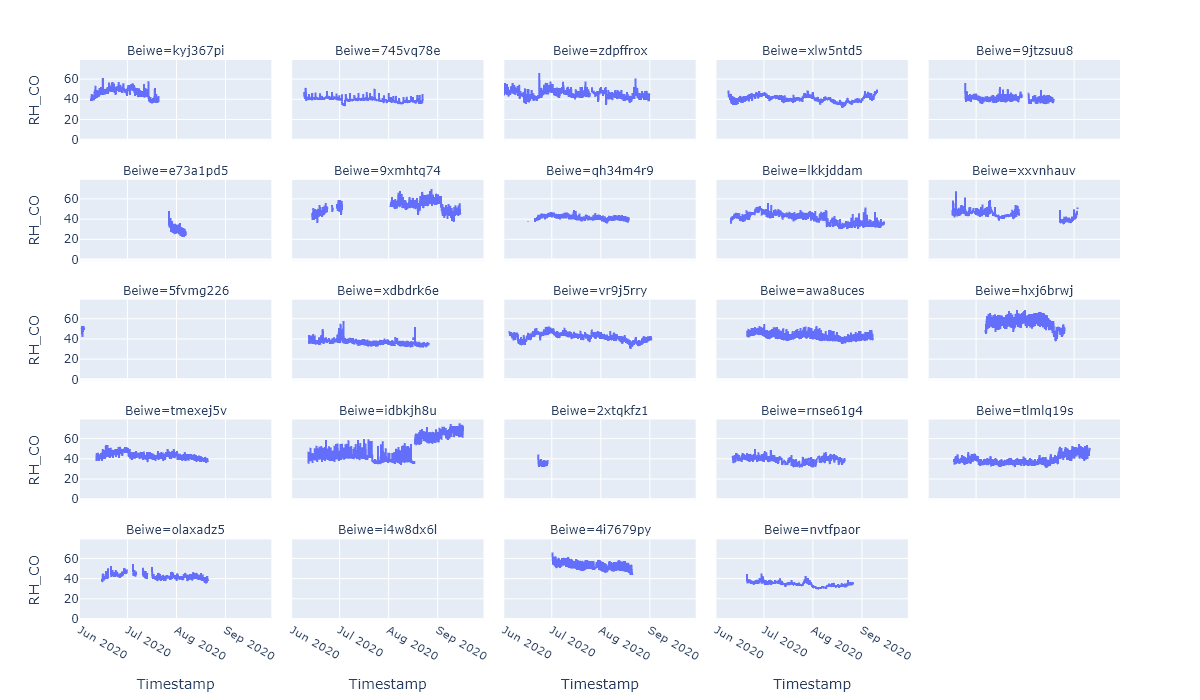

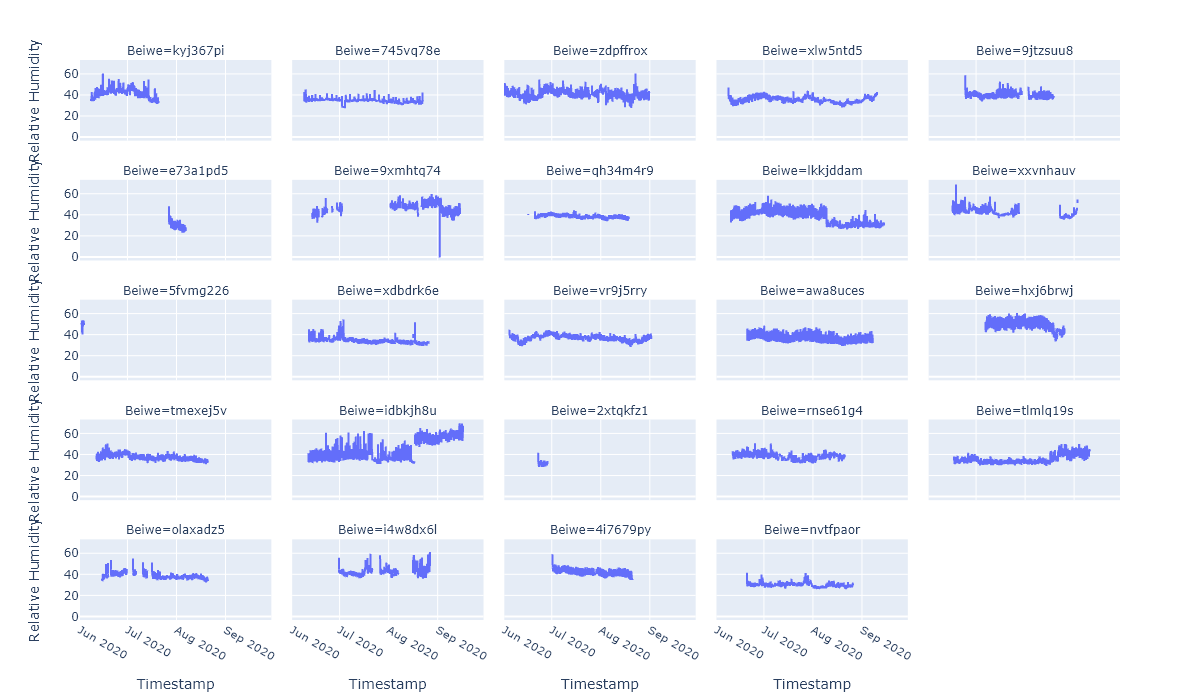

In [25]:
def timefacet(df):
    important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']

    for var in important_vars: 
        fig = px.line(df, x=df.index.get_level_values('Timestamp'), y=var,
                      facet_col='Beiwe', facet_col_wrap=5,
                     width=1200, height=700)

        #fig = pplot.update_layout(fig, fontsize=14, nticks=8)
        fig.show("png",width=1200, height=700)

timefacet(data)

### Histogram

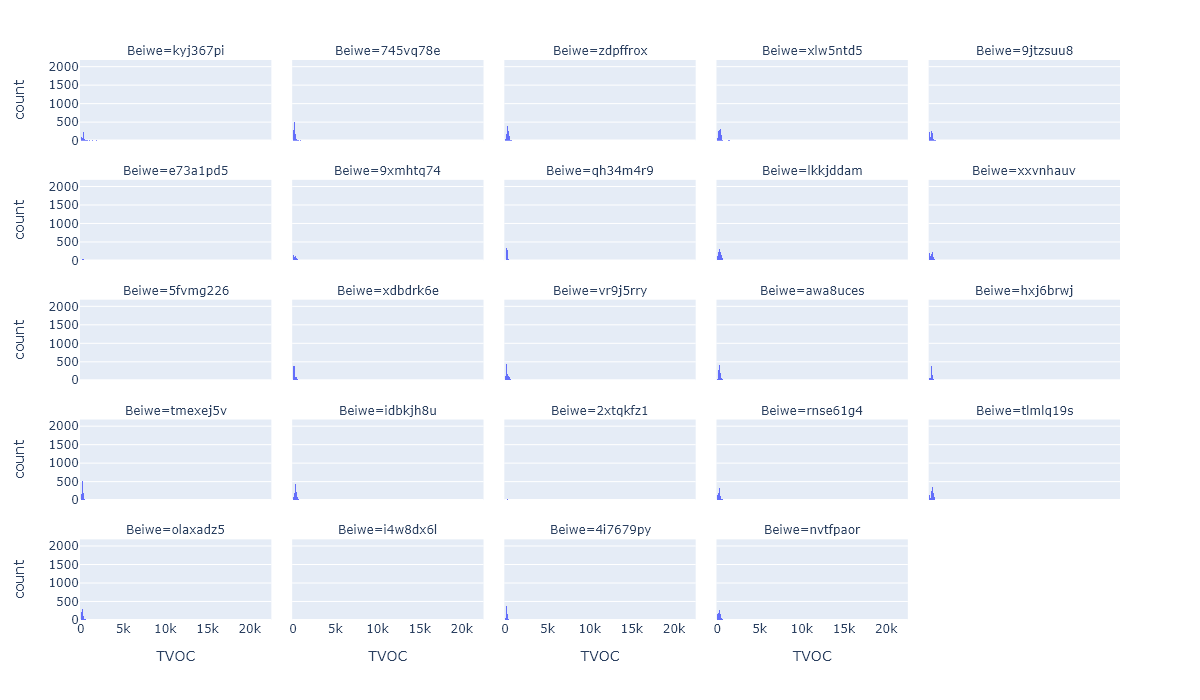

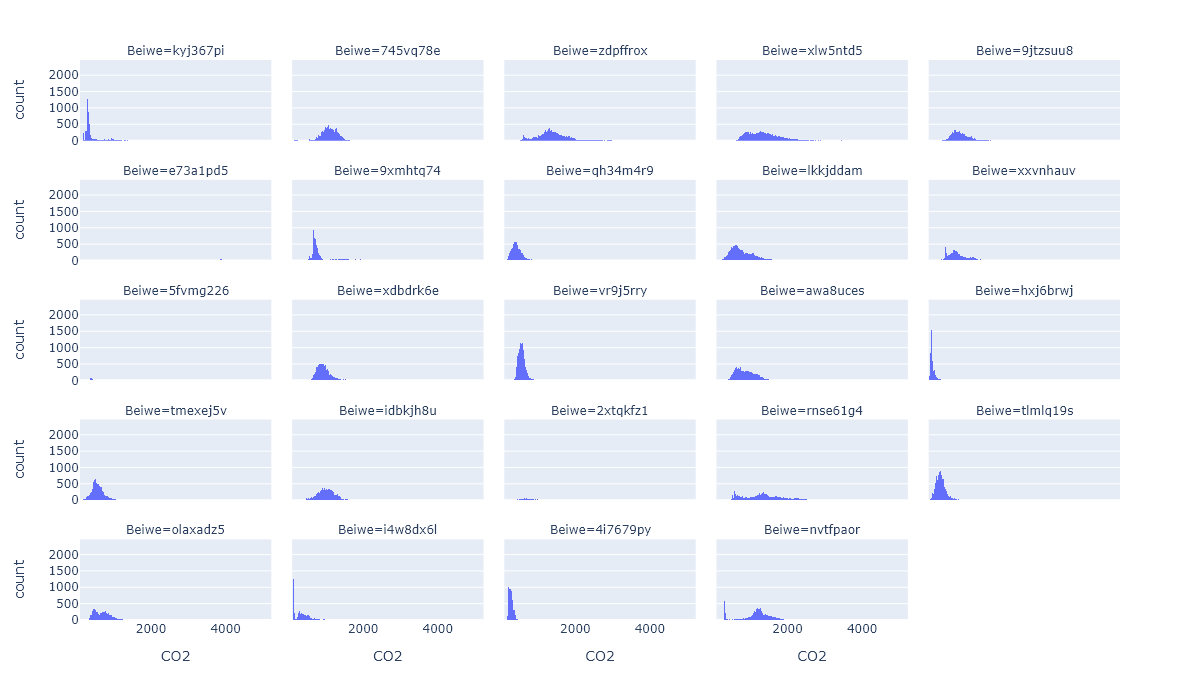

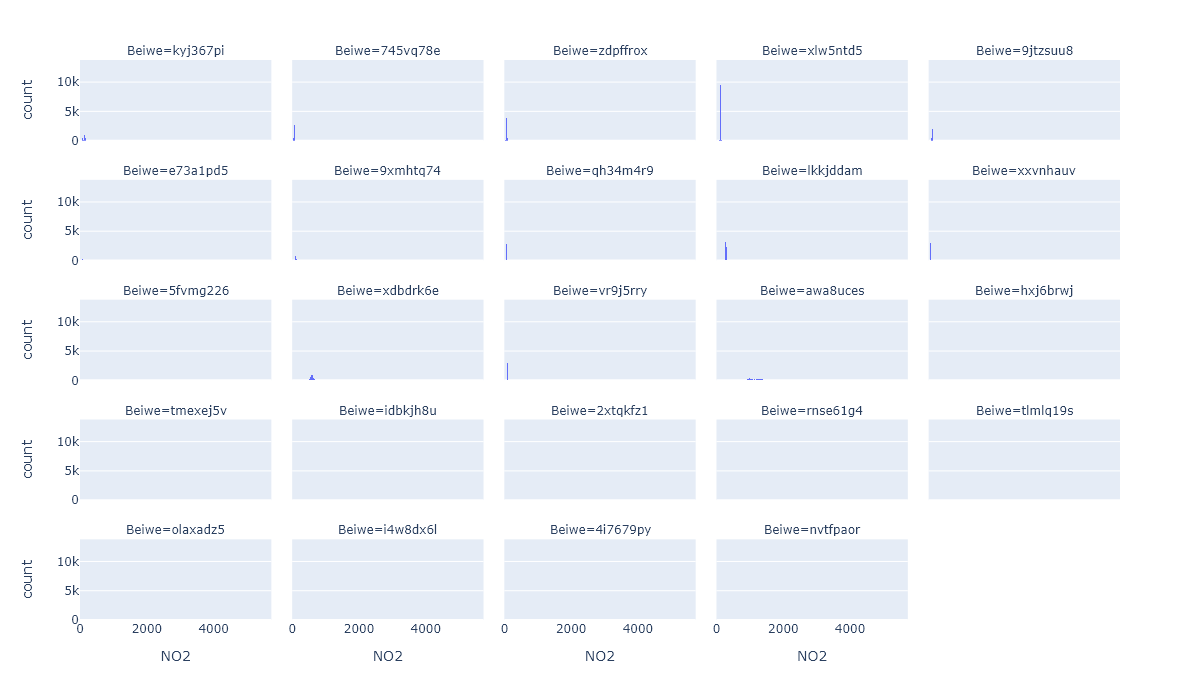

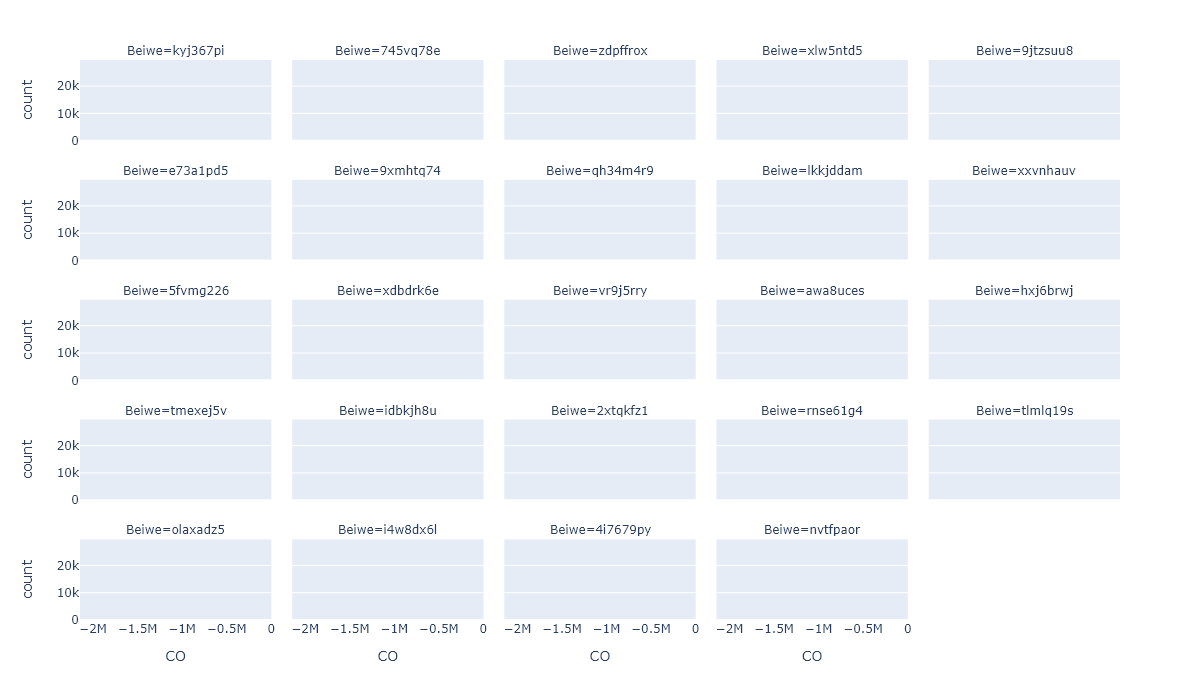

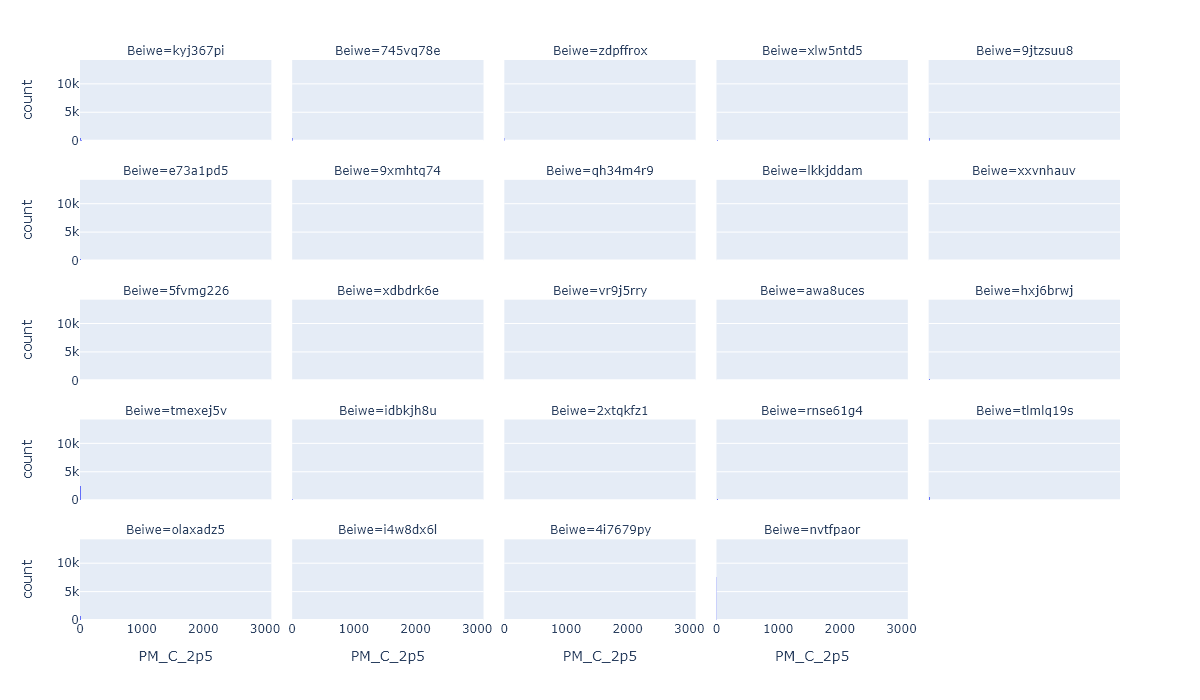

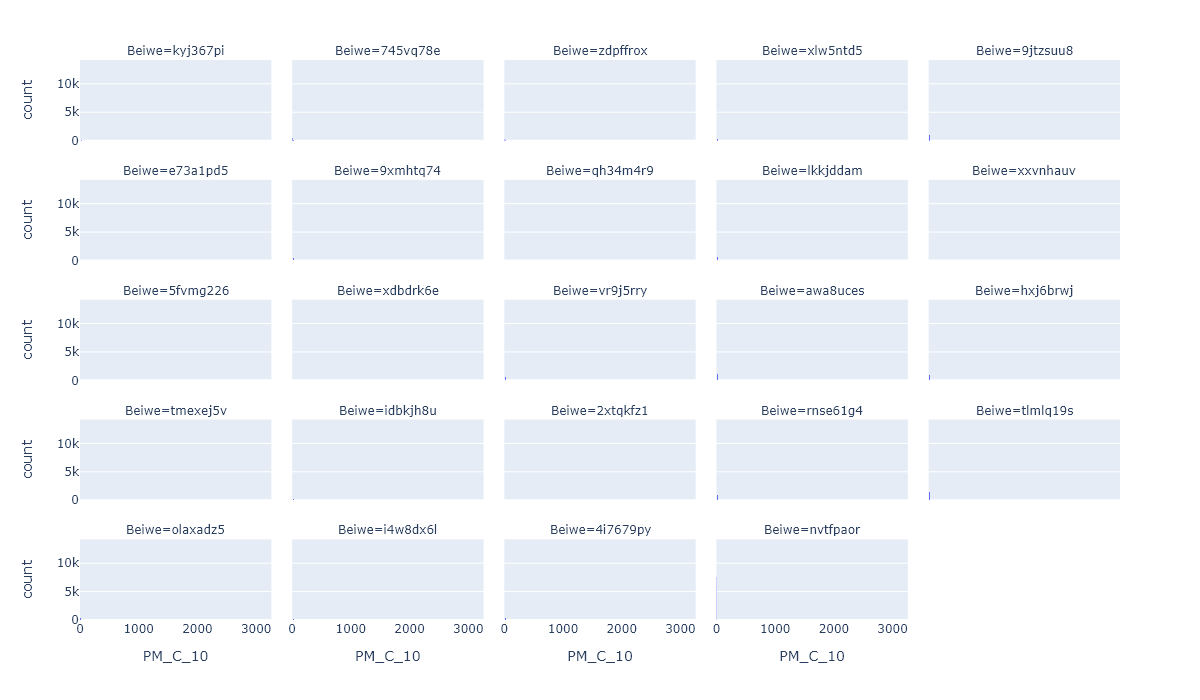

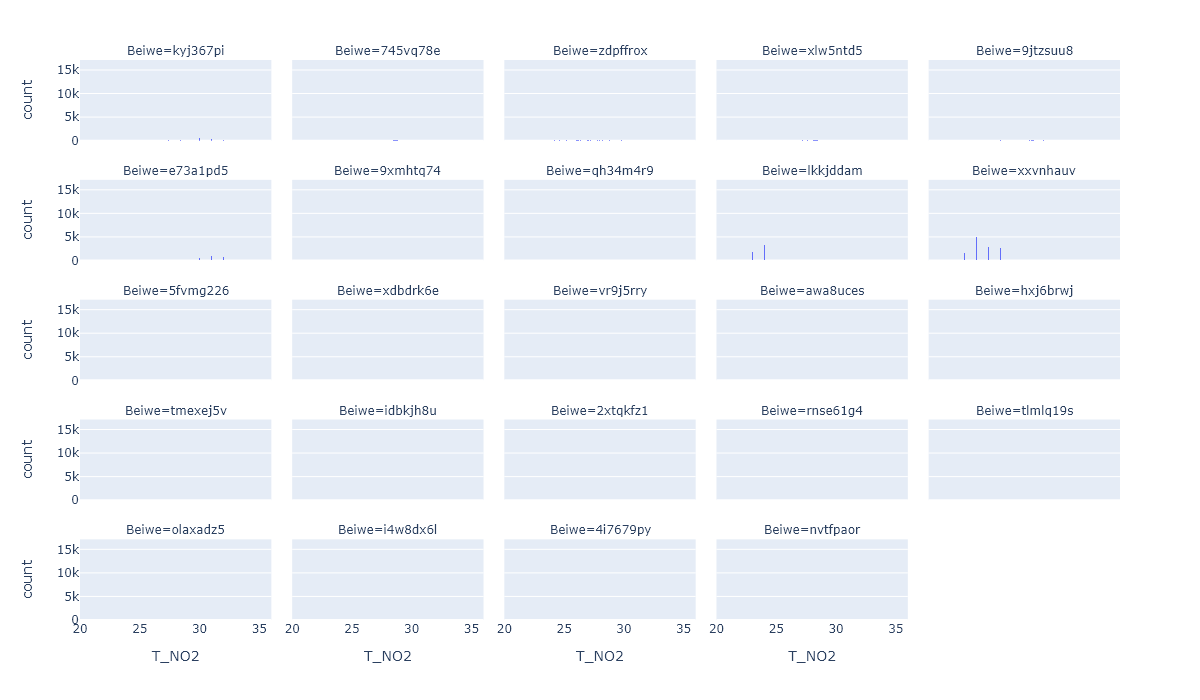

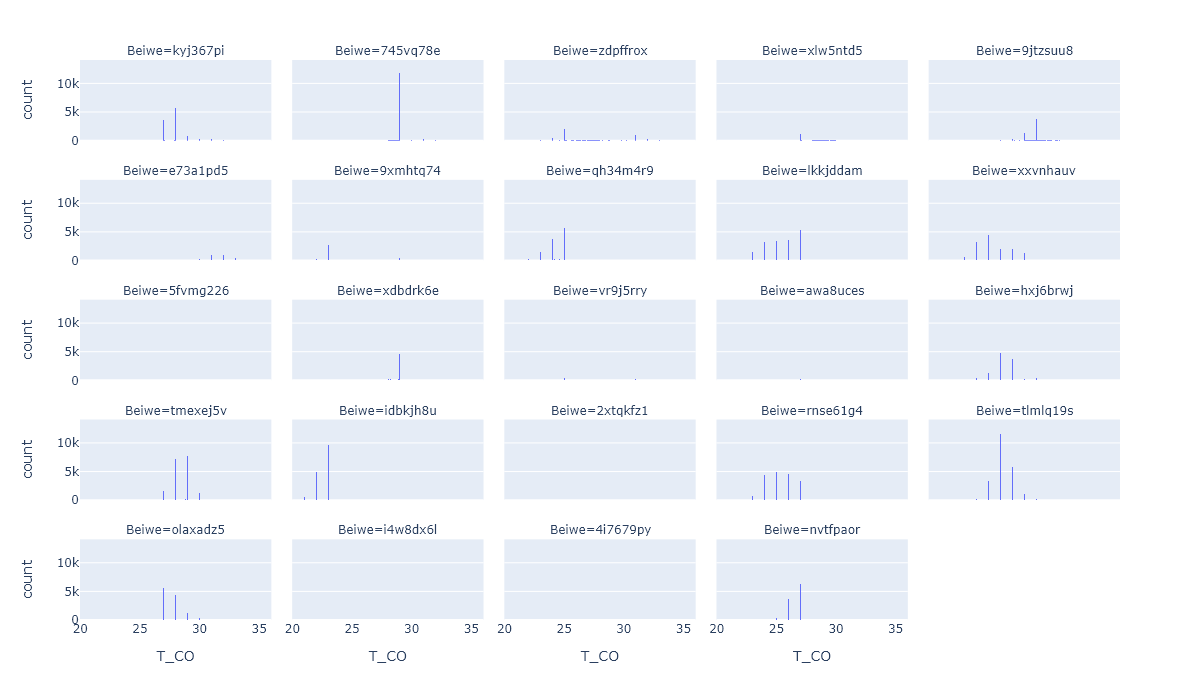

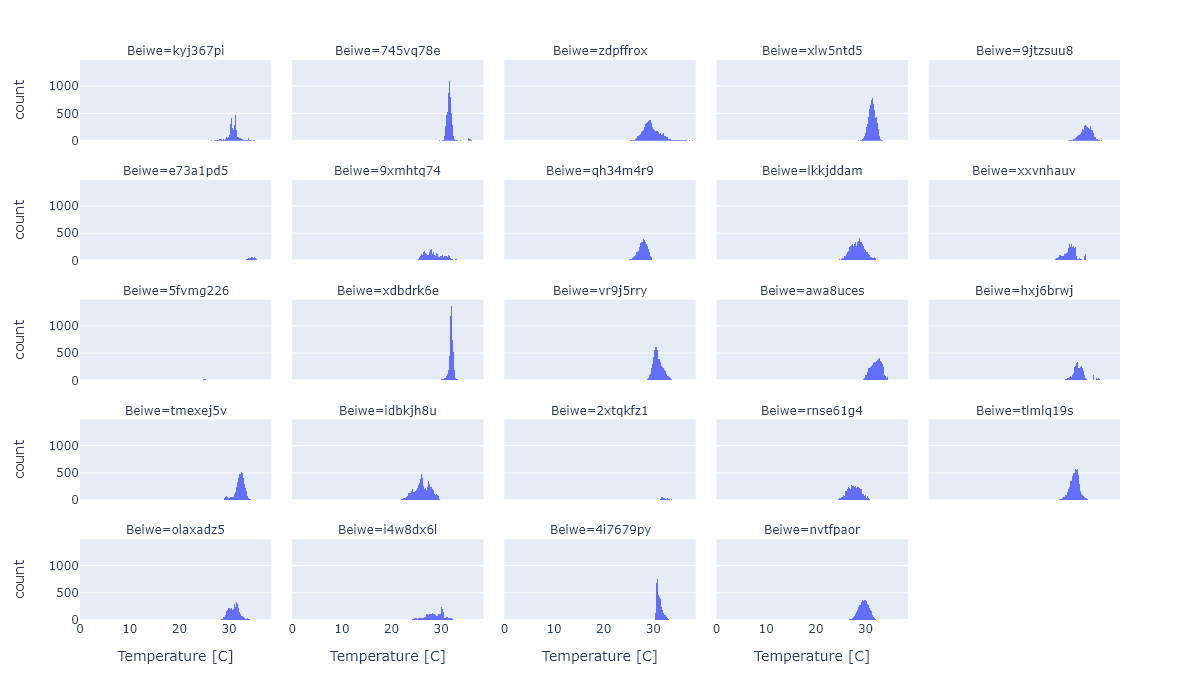

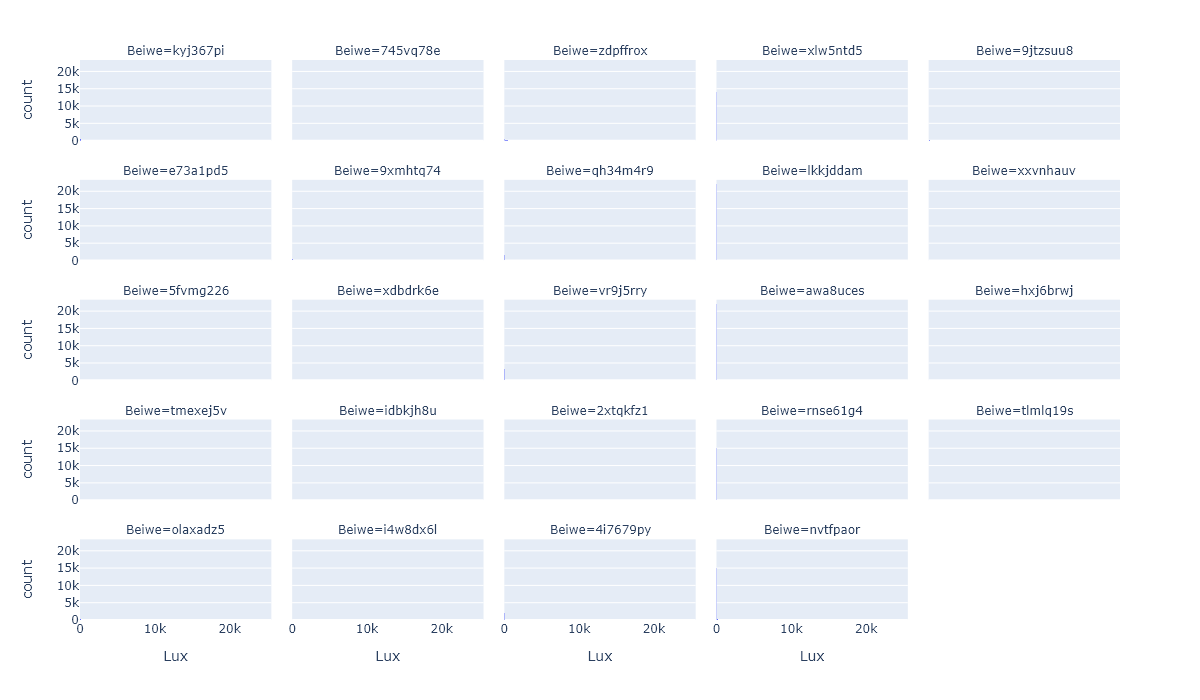

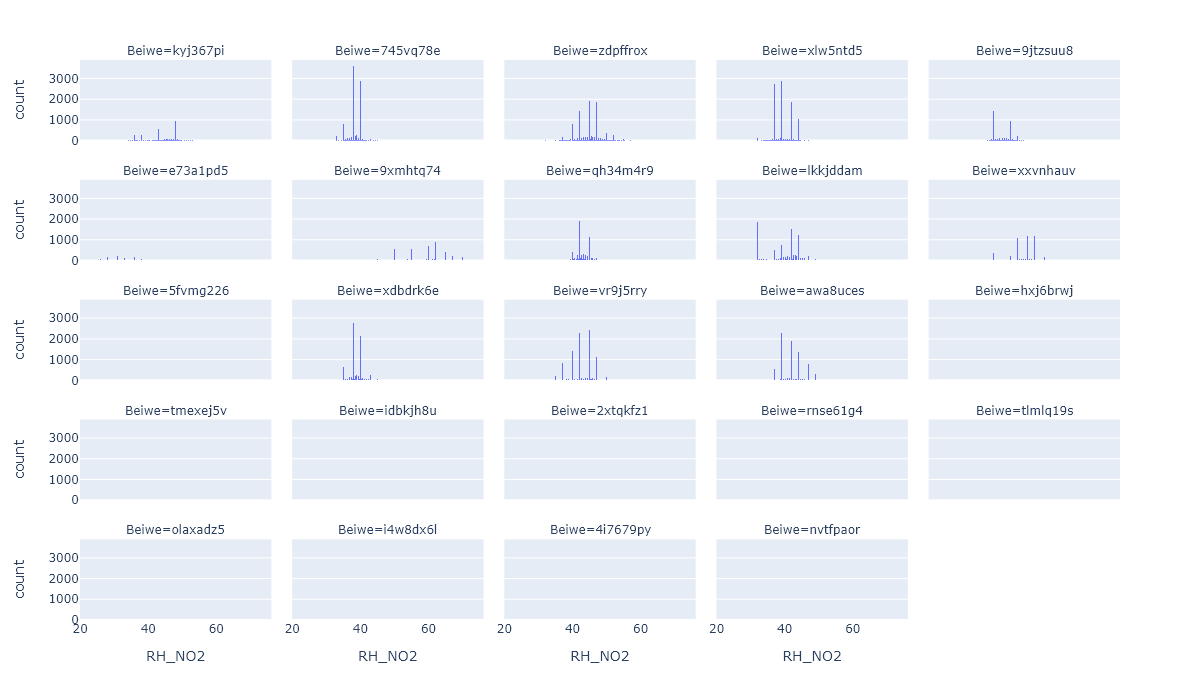

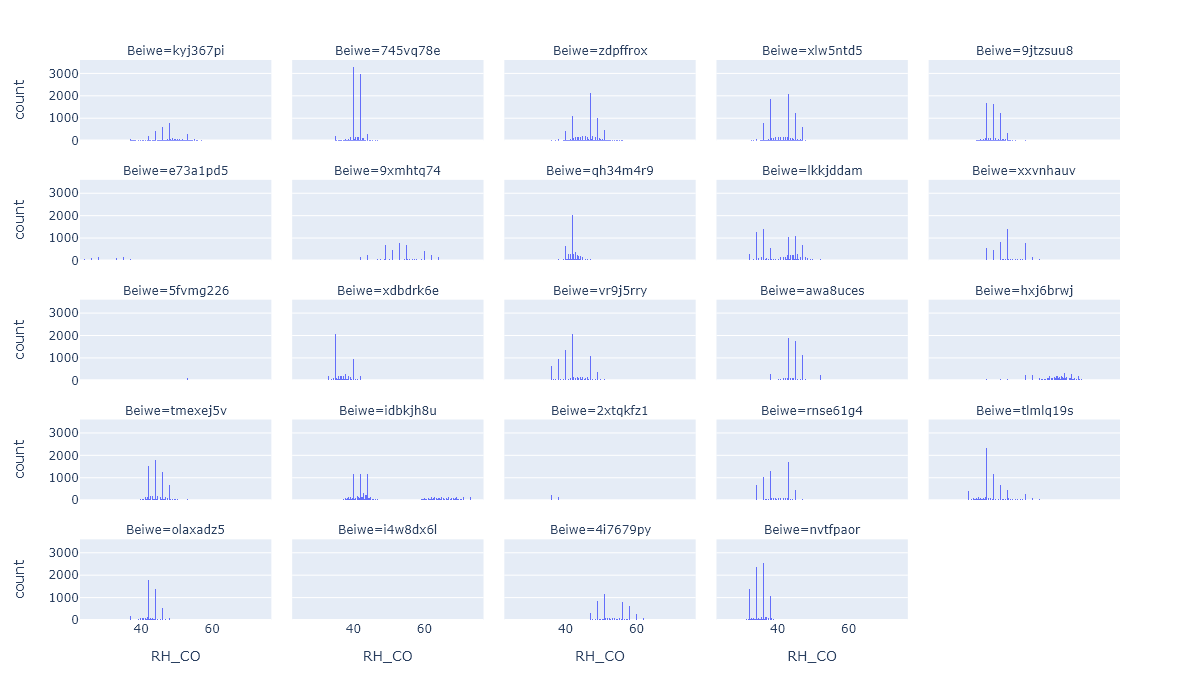

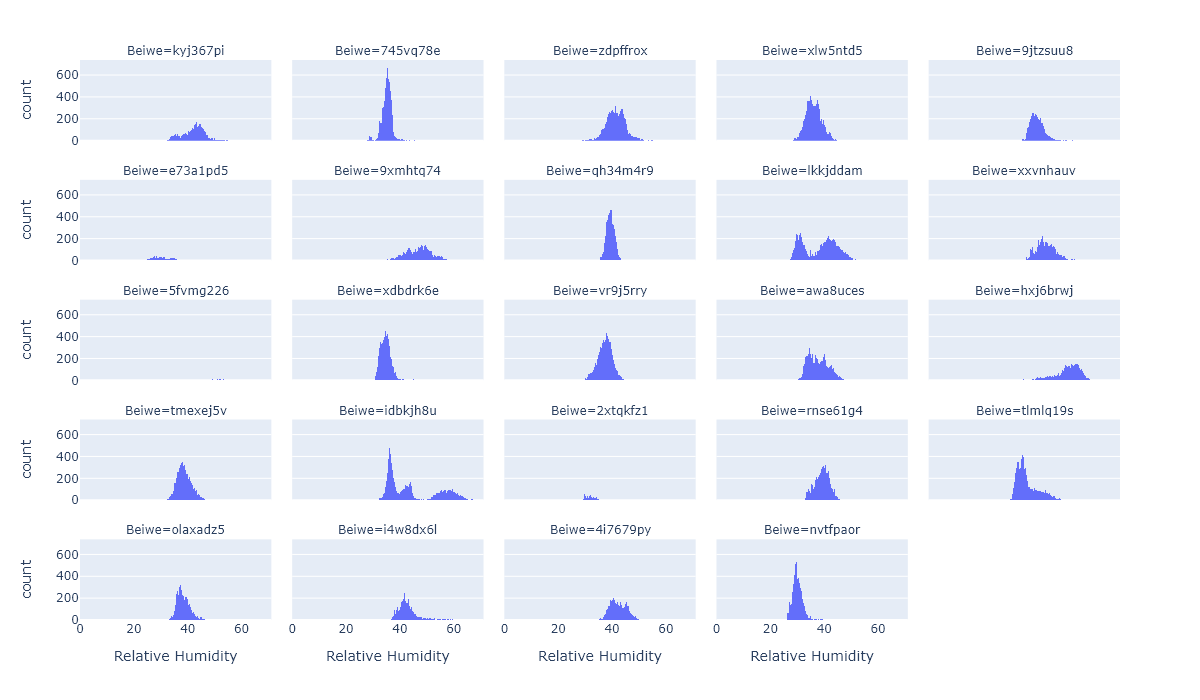

In [29]:
def histofacet(df):
    important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']

    for var in important_vars: 
        fig = px.histogram(df, x=var,
                      facet_col='Beiwe', facet_col_wrap=5,
                     width=1200, height=700)

        #fig = pplot.update_layout(fig, fontsize=14, nticks=8)
        fig.show("png",width=1200, height=700)

histofacet(data)

## Current Data Cleaning with Z-score of 2.5

In [27]:
cleaned_data = pd.read_parquet('../data/processed/bpeace2-beacon.parquet')

### Timeseries

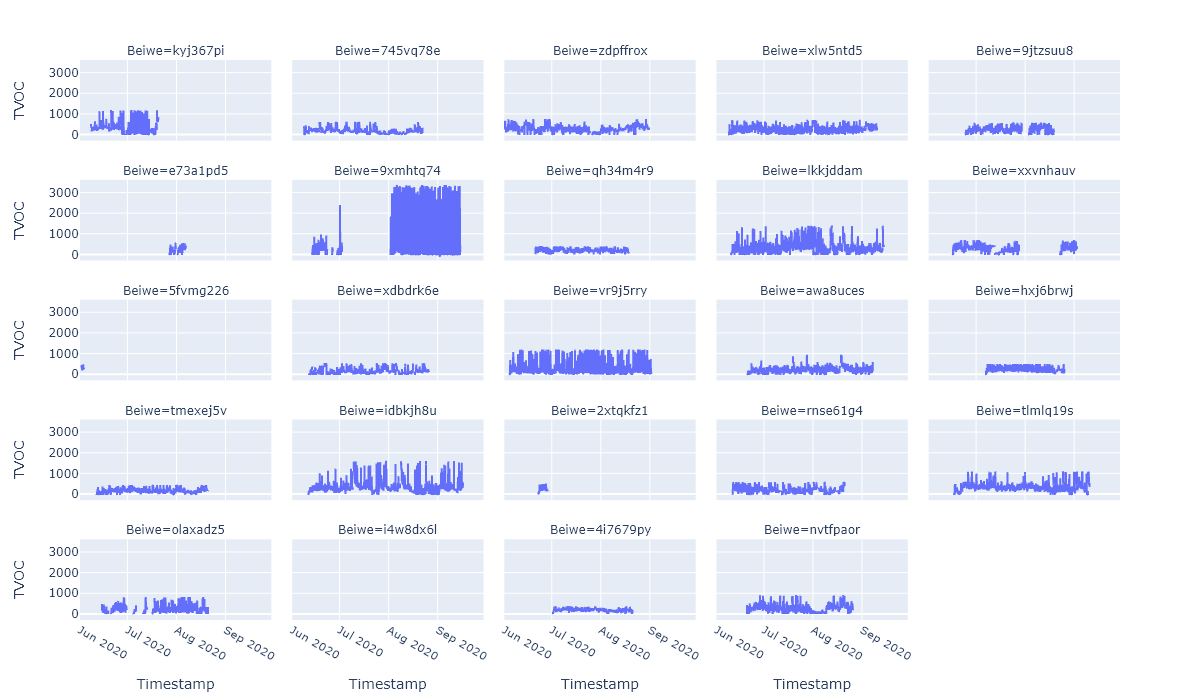

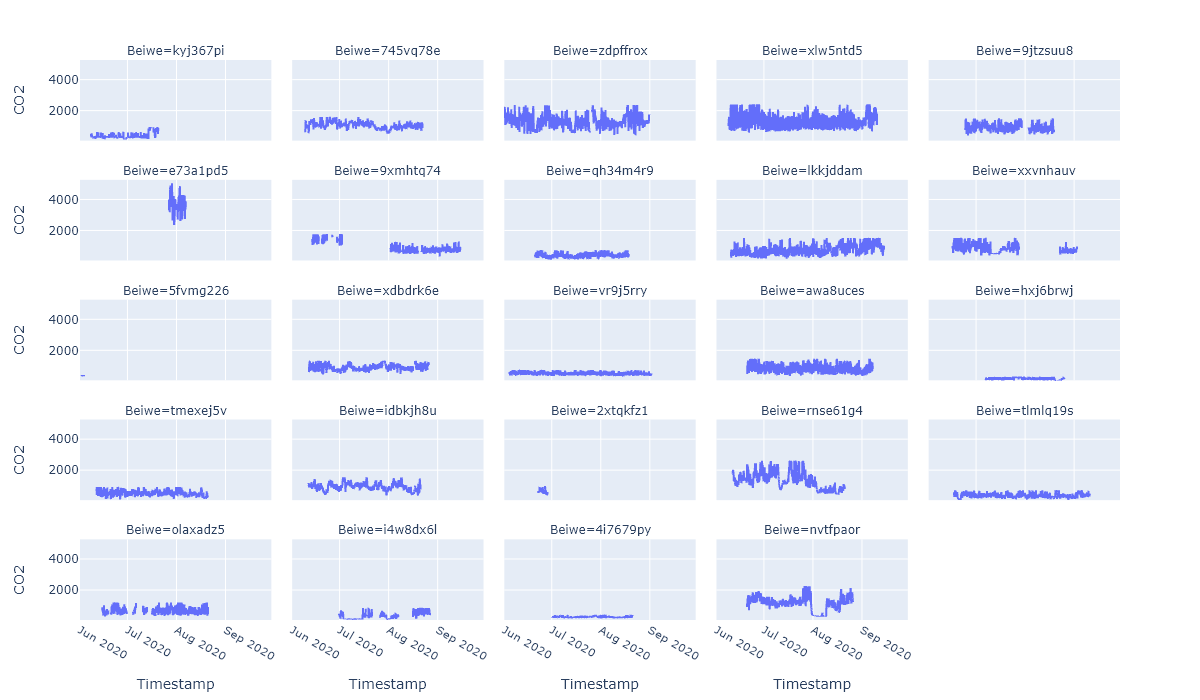

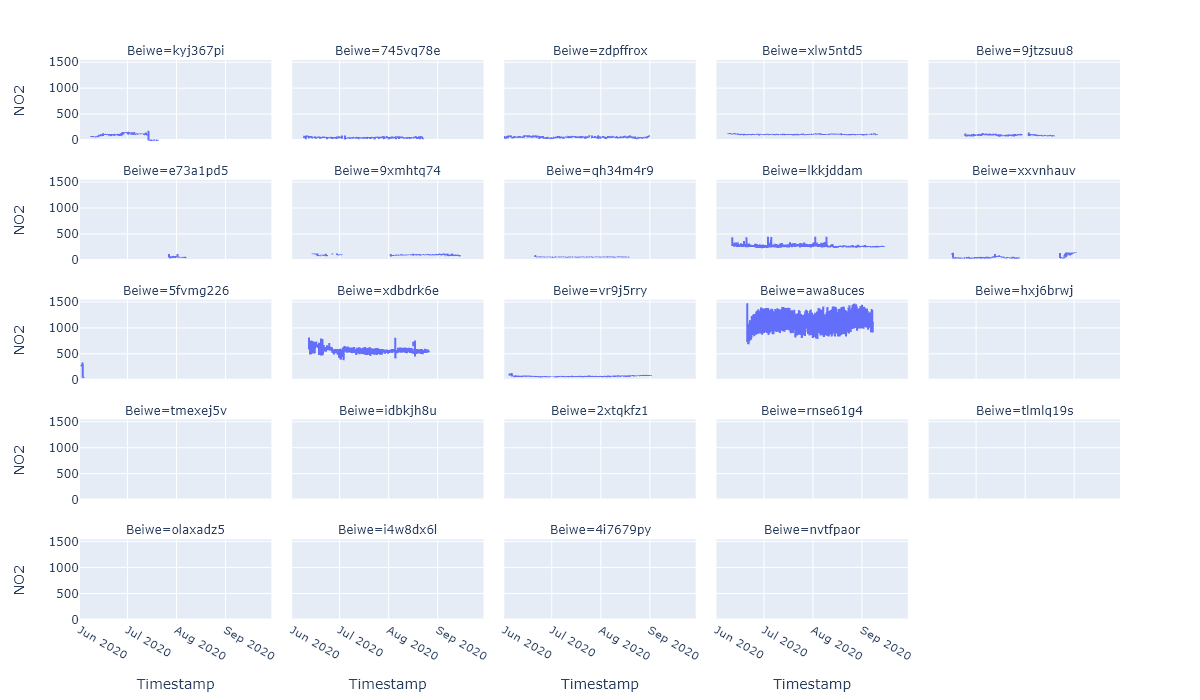

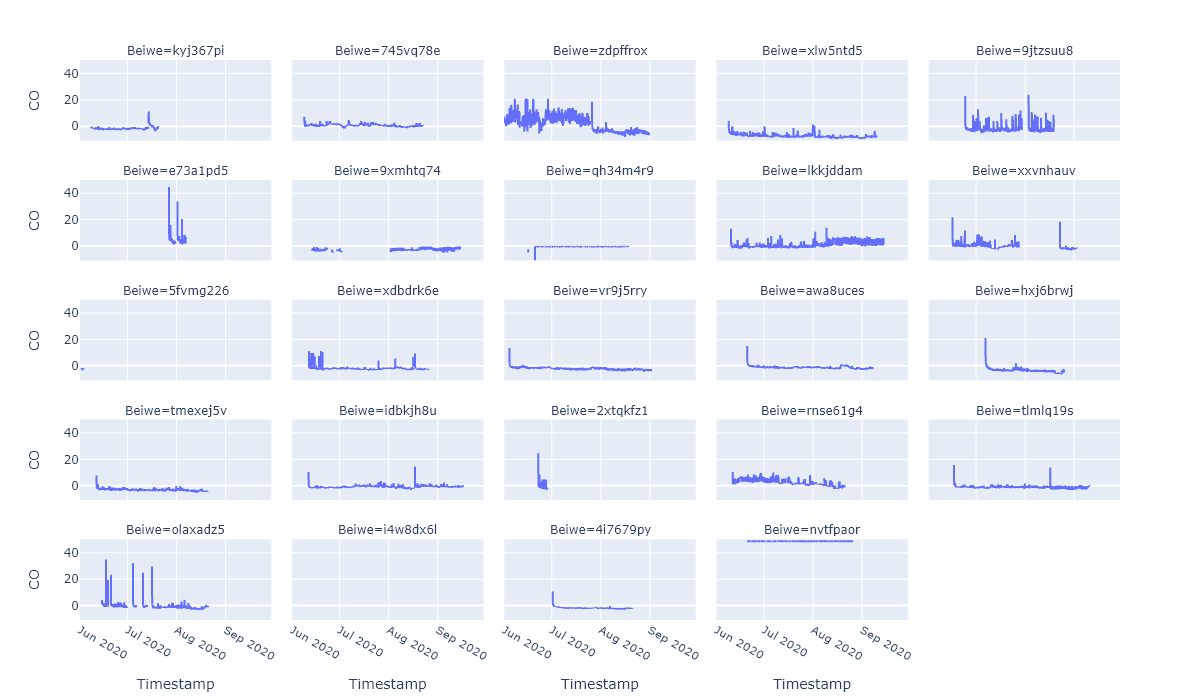

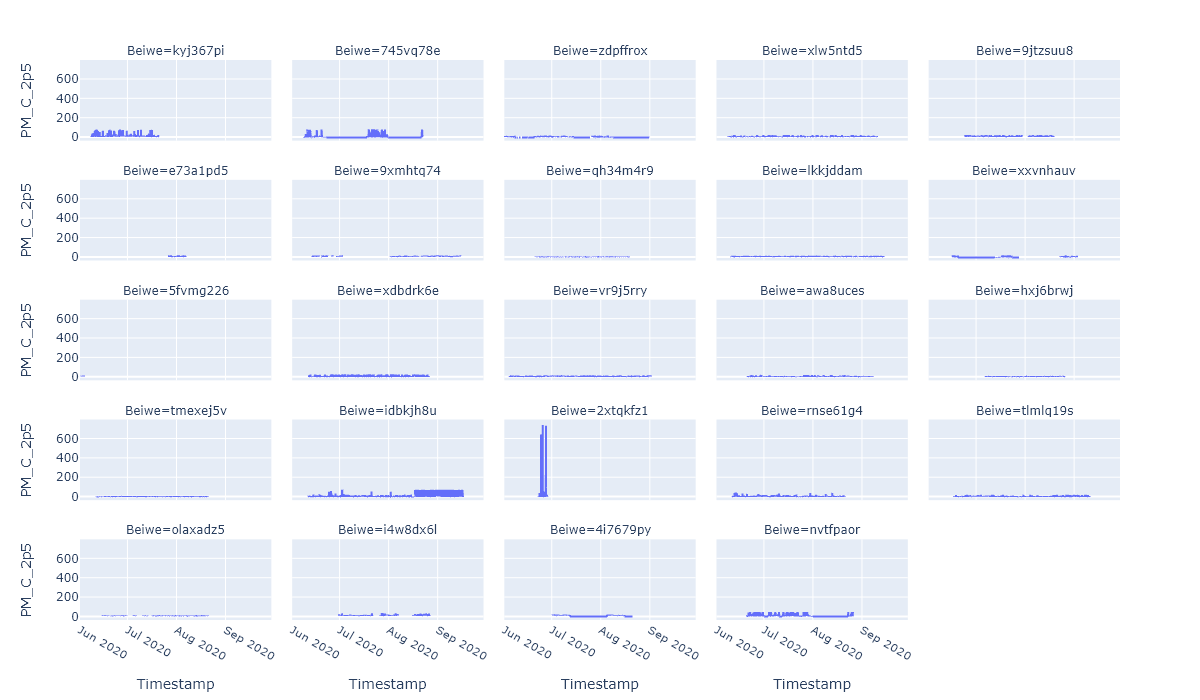

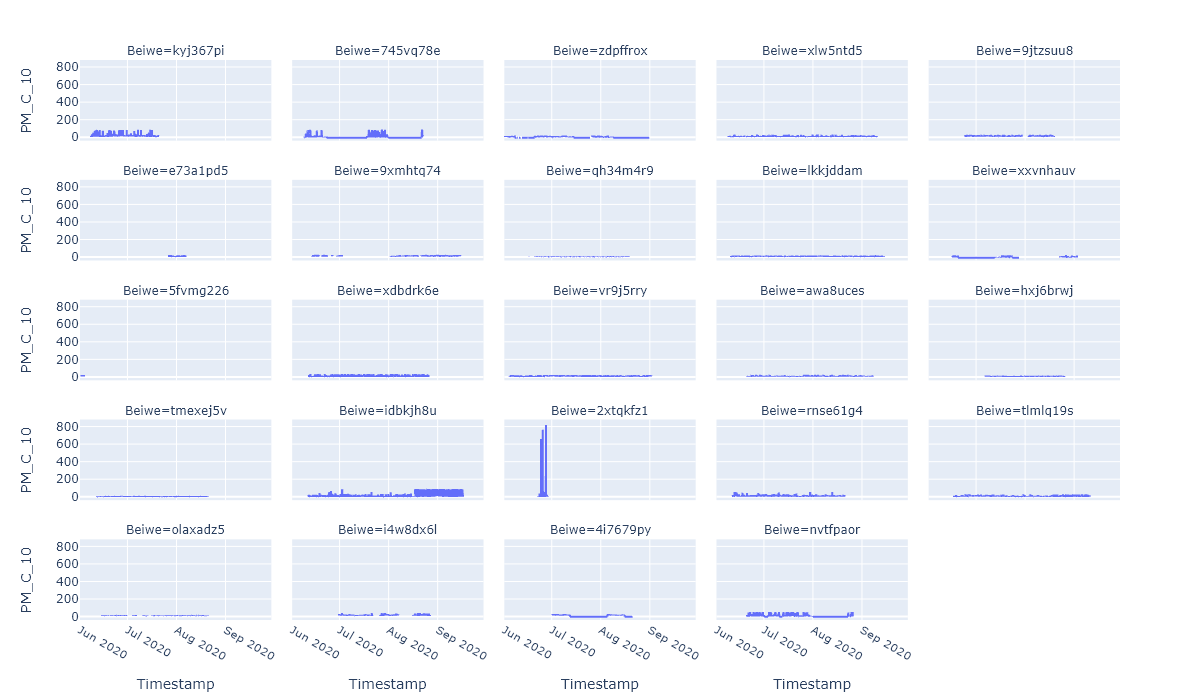

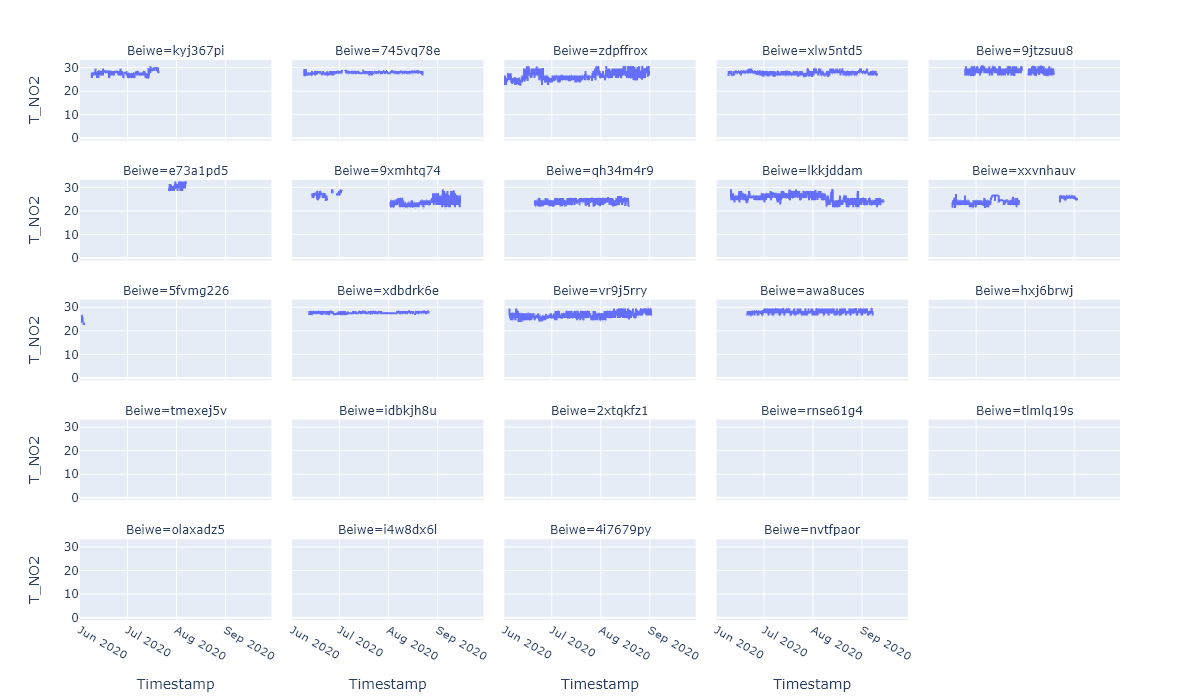

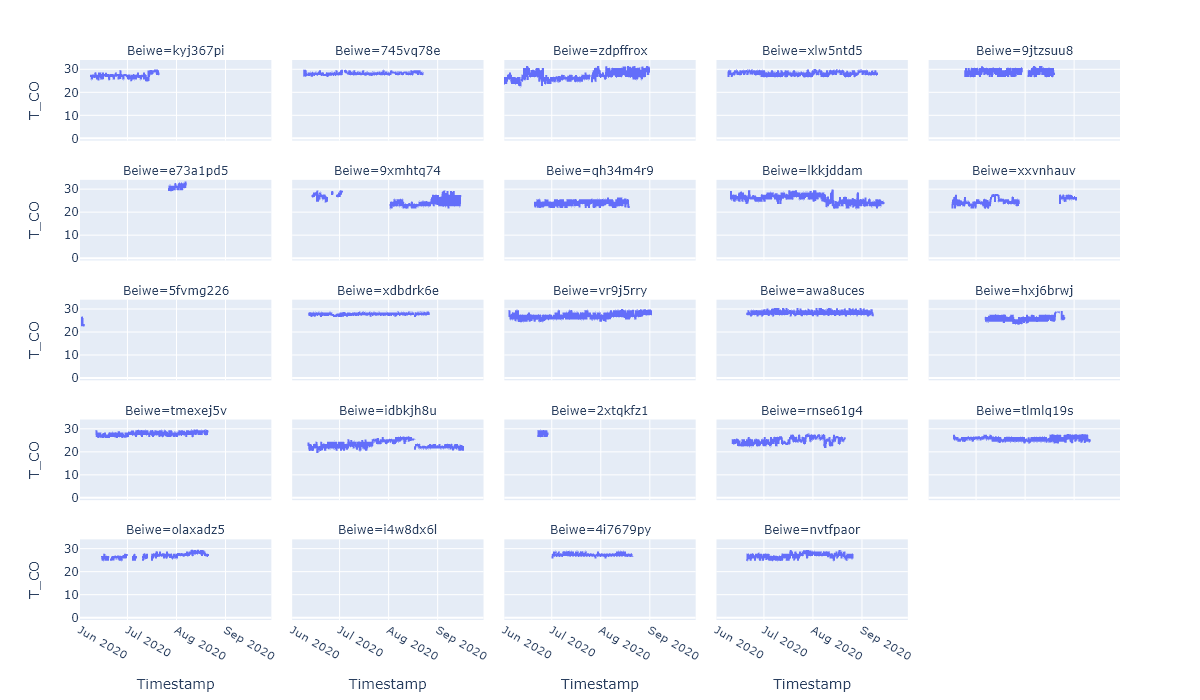

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



In [ ]:
timefacet(cleaned_data)

### Histogram

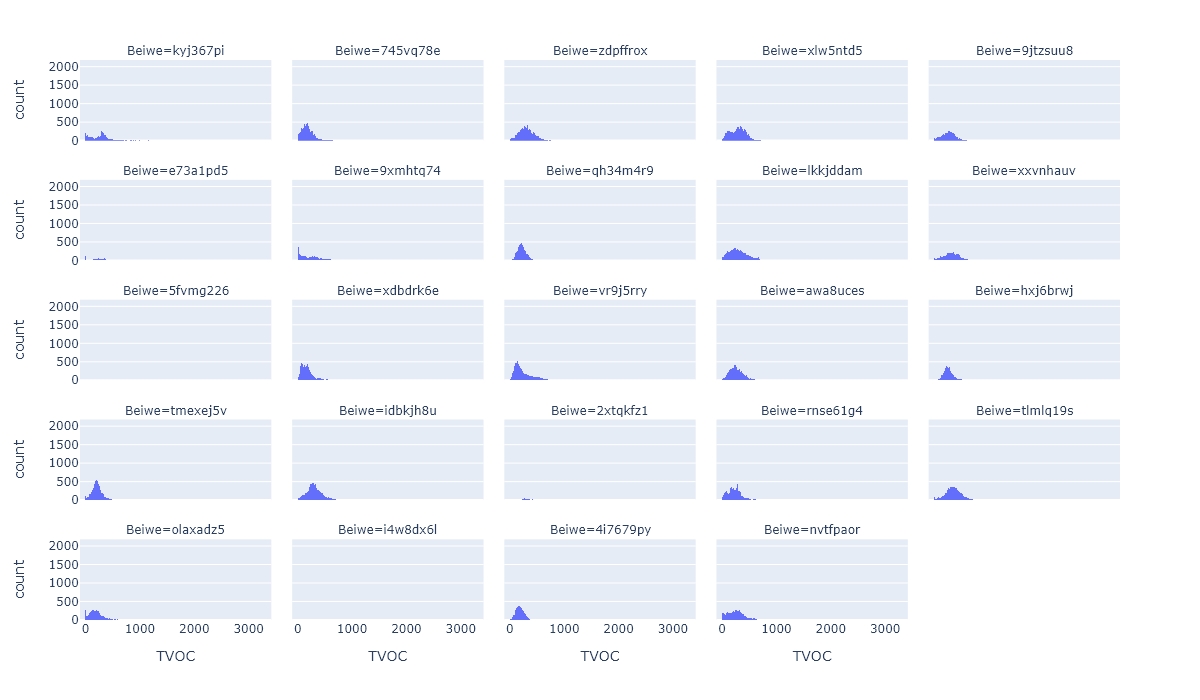

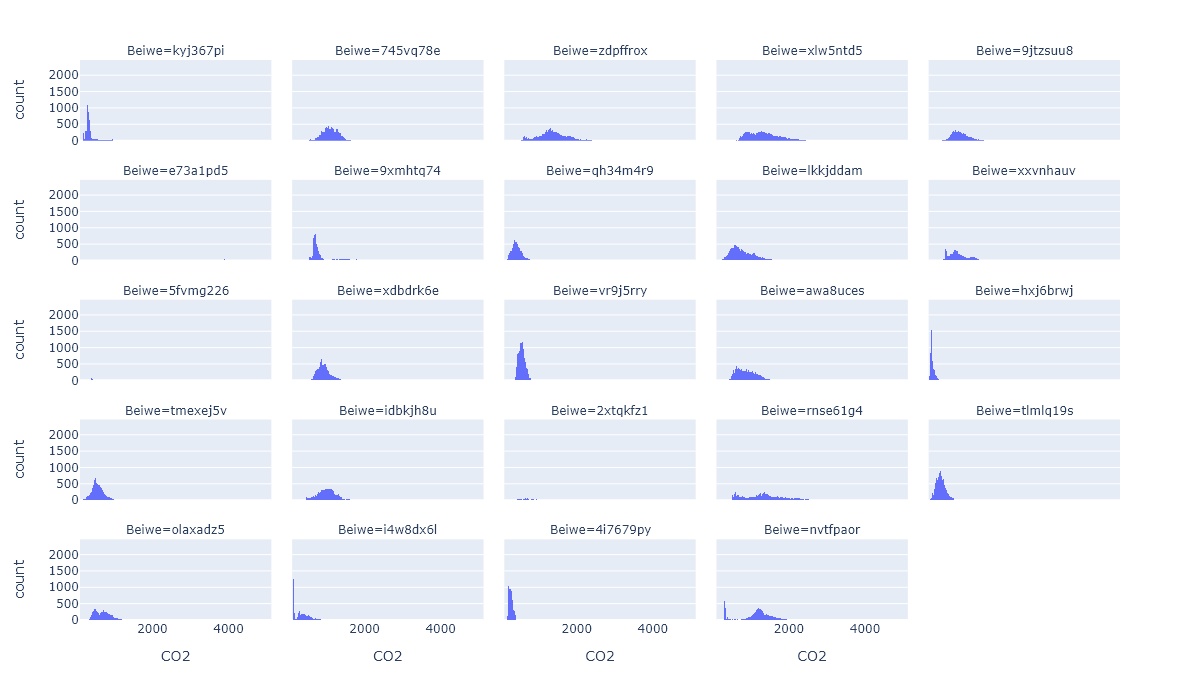

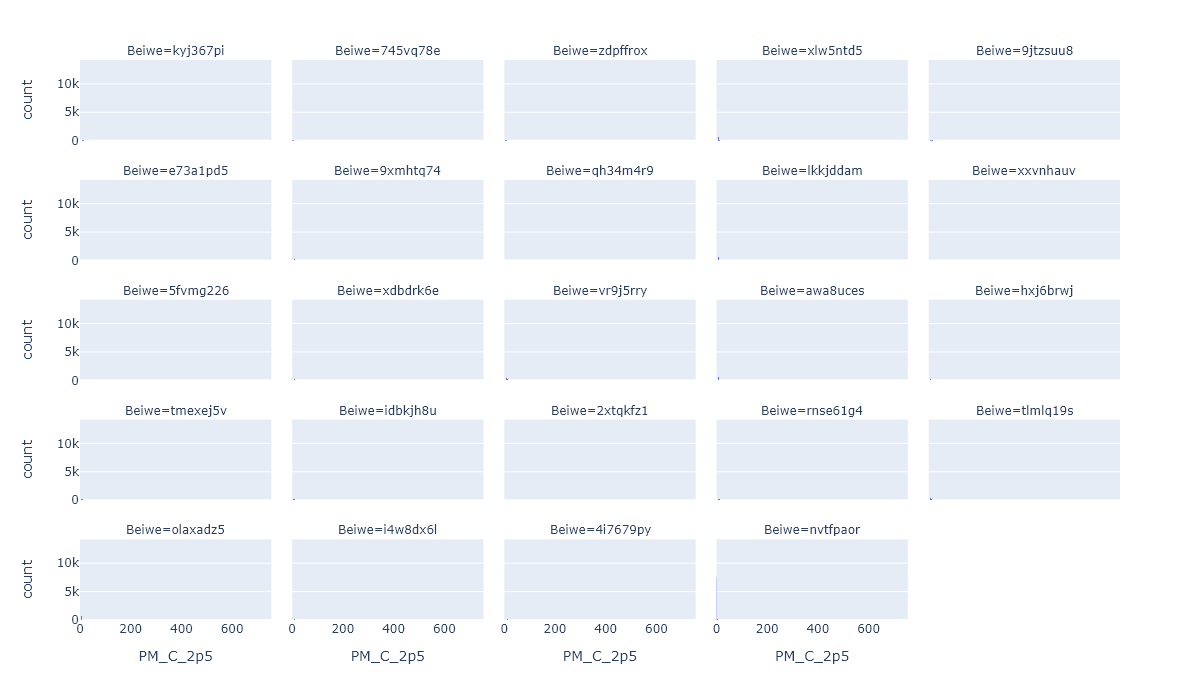

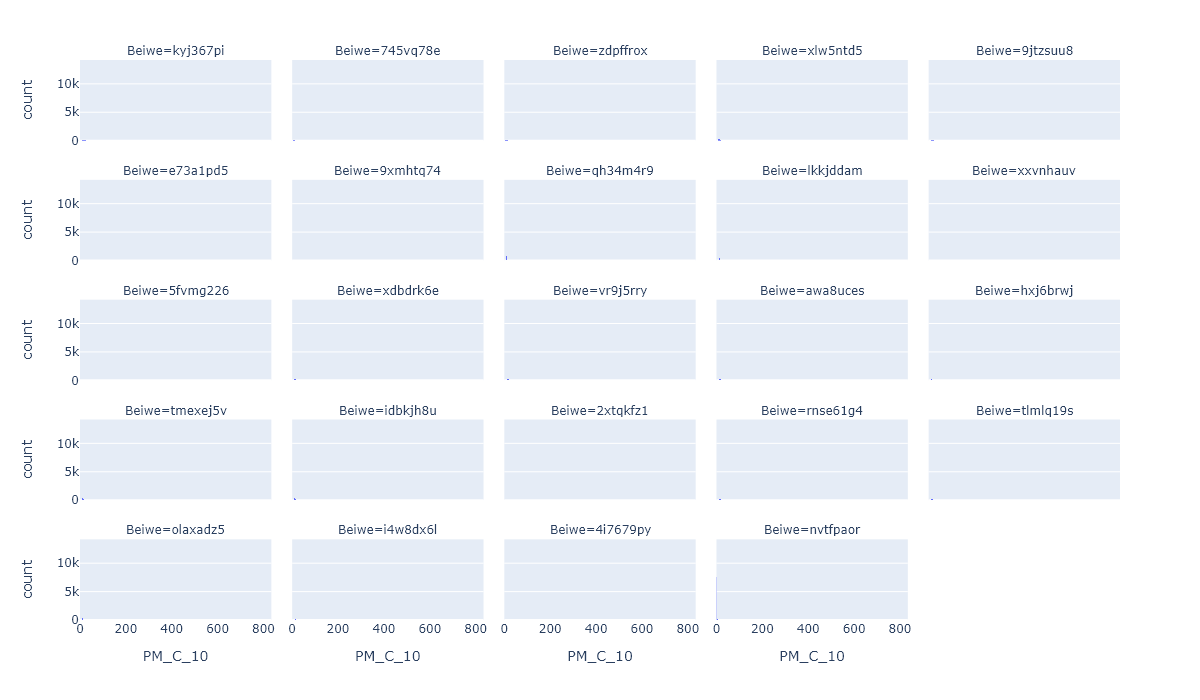

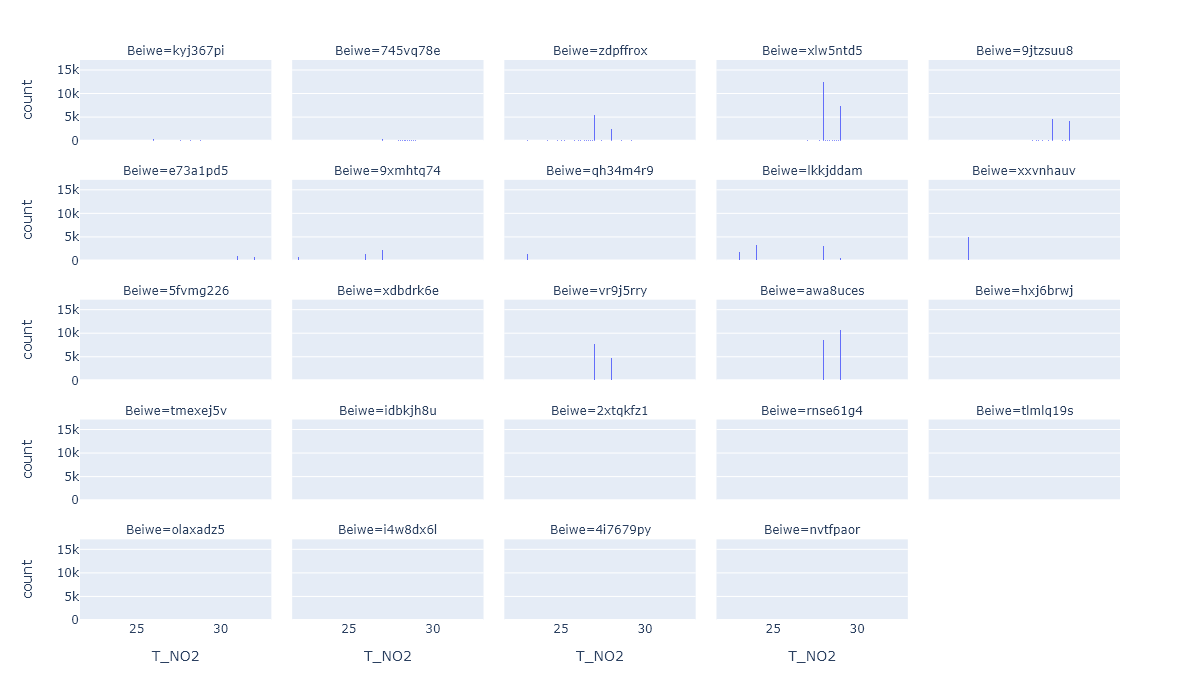

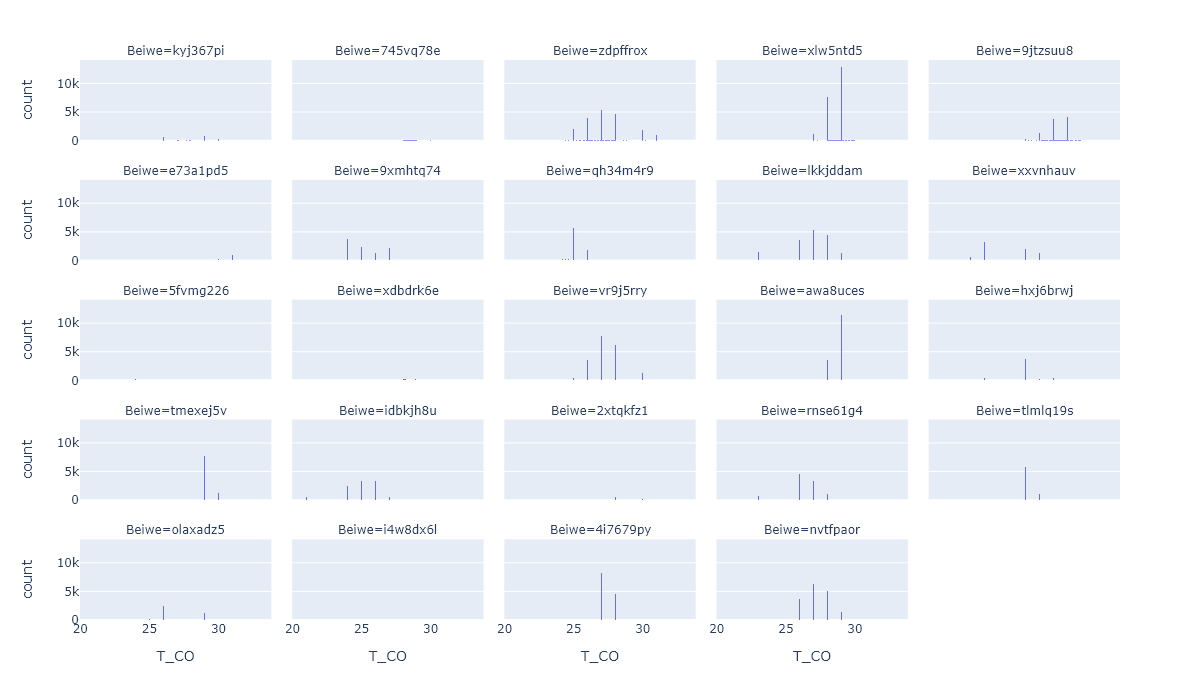

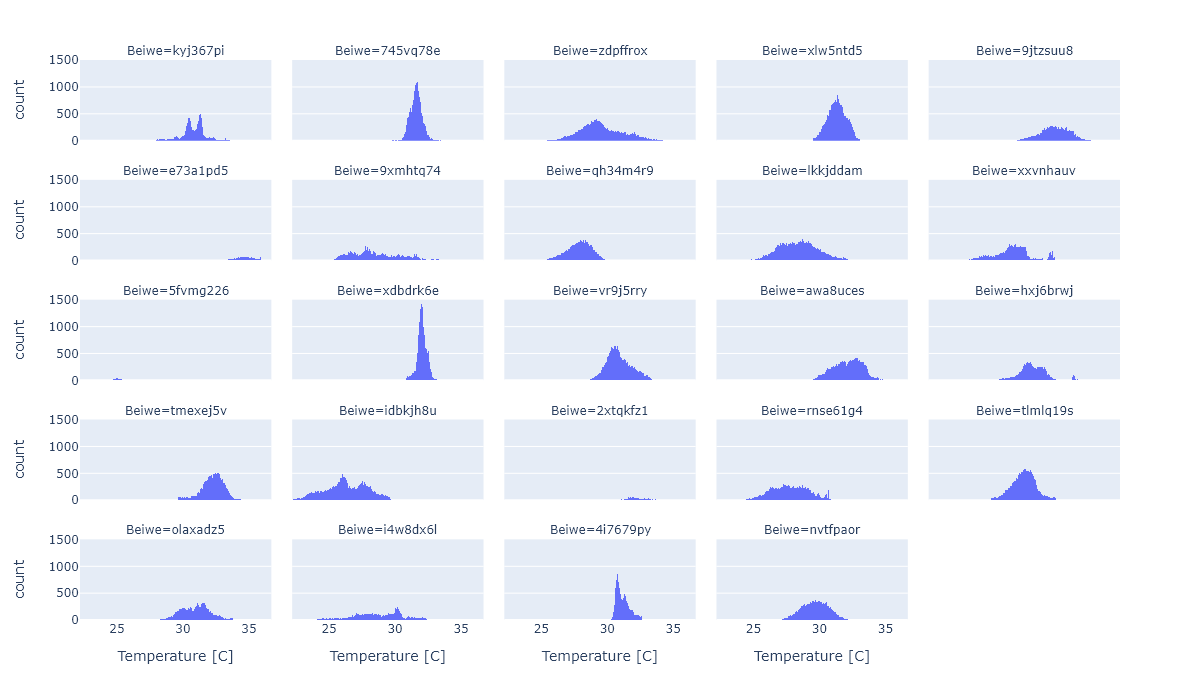

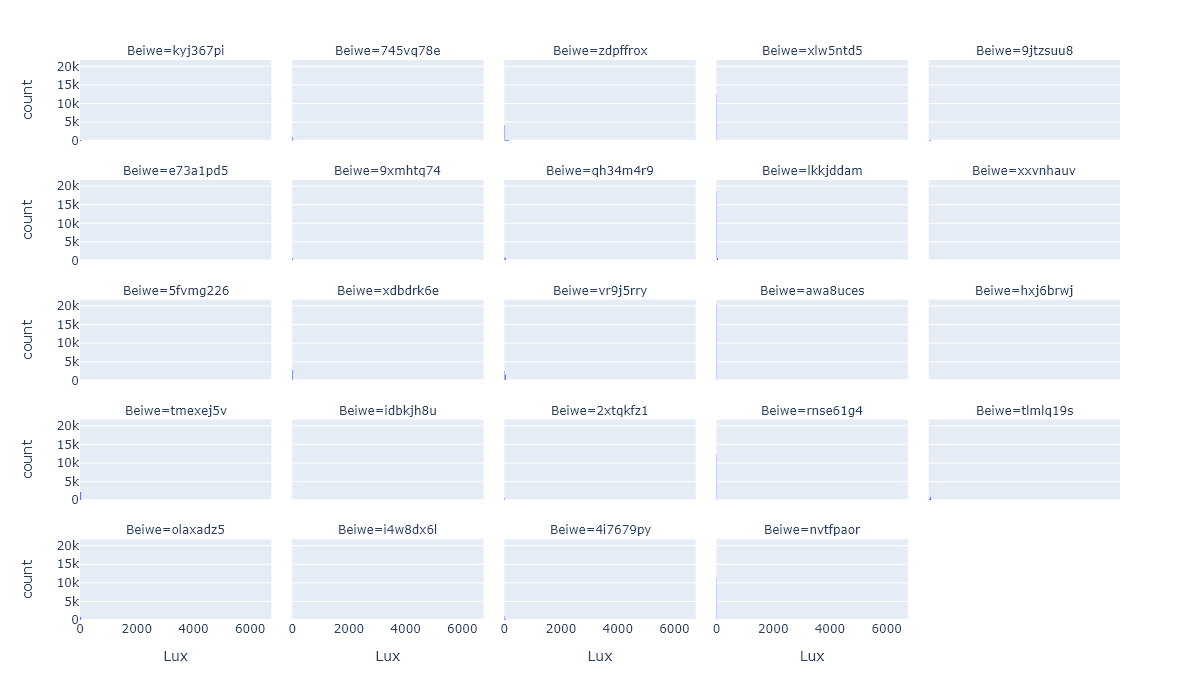

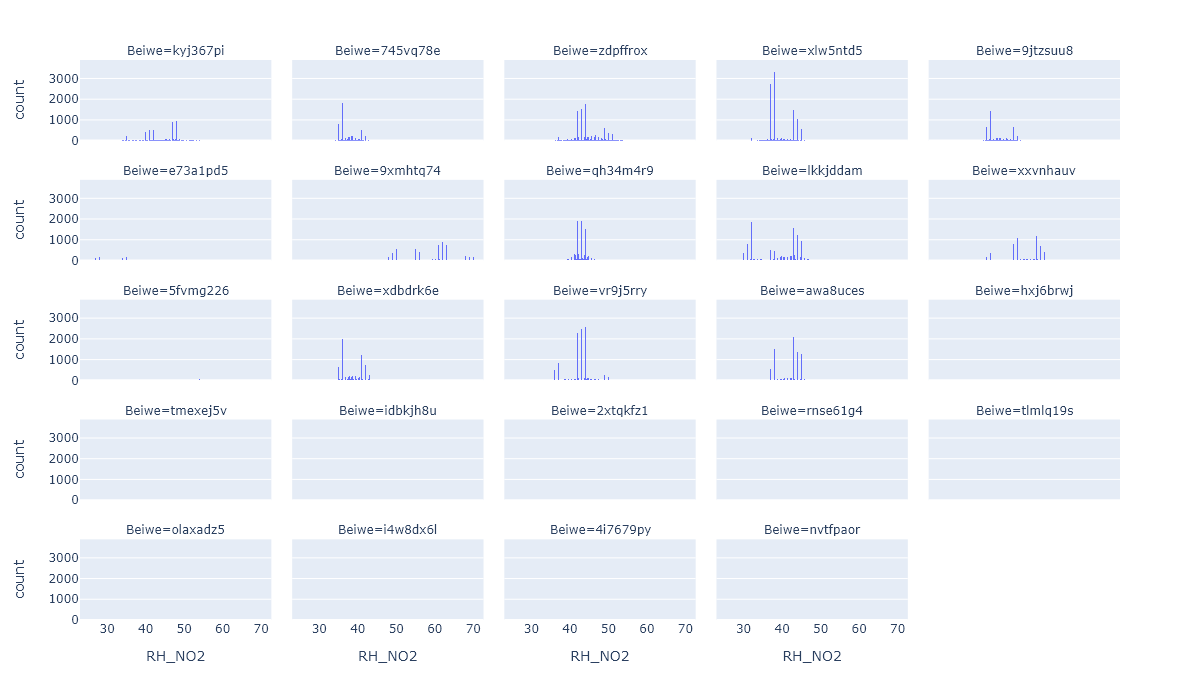

In [30]:
histofacet(cleaned_data)

## Setting Up Multiindex

In [55]:
def set_multiindex(df):
    return df.set_index(['Beiwe', 'Timestamp'])

data_copy = set_multiindex(data.copy().reset_index())

In [16]:
# data_copy2.groupby([pd.Grouper(level='Beiwe'),pd.Grouper(level='Timestamp', freq='H')]).mean()
data_copy2.groupby([pd.Grouper(level='Beiwe')]).resample('H',level='Timestamp').mean()

TVOC         eCO2     Lux  Visible  \
Beiwe    Timestamp                                                       
2xtqkfz1 2020-06-22 00:00:00         NaN          NaN     NaN      NaN   
         2020-06-22 01:00:00         NaN          NaN     NaN      NaN   
         2020-06-22 02:00:00         NaN          NaN     NaN      NaN   
         2020-06-22 03:00:00         NaN          NaN     NaN      NaN   
         2020-06-22 04:00:00         NaN          NaN     NaN      NaN   
...                                  ...          ...     ...      ...   
zdpffrox 2020-08-31 20:00:00  285.497500  1306.659167  1.1696  5461.96   
         2020-08-31 21:00:00  310.740833  1360.689167  0.3060     0.15   
         2020-08-31 22:00:00  290.780000  1280.296667  0.0000     0.00   
         2020-08-31 23:00:00  269.353333  1257.678333  0.0000     0.00   
         2020-09-01 00:00:00  269.280000  1274.120000  0.0000     0.00   

                              Infrared        NO2      T_NO2     RH_NO2  \
Beiwe    Timestamp                                                        
2xtqkfz1 2020-06-22 00:00:00       NaN        NaN        NaN        NaN   
         2020-06-22 01:00:00       NaN        NaN        NaN        NaN   
         2020-06-22 02:00:00       NaN        NaN        NaN        NaN   
         2020-06-22 03:00:00       NaN        NaN        NaN        NaN   
         2020-06-22 04:00:00       NaN        NaN        NaN        NaN   
...                                ...        ...        ...        ...   
zdpffrox 2020-08-31 20:00:00  0.083333  83.117500  28.116667  44.236667   
         2020-08-31 21:00:00  0.000000  81.647500  28.000000  46.330000   
         2020-08-31 22:00:00  0.000000  76.733333  27.913333  46.091667   
         2020-08-31 23:00:00  0.000000  75.733333  27.612500  45.935000   
         2020-09-01 00:00:00  0.000000  75.920000  27.320000  46.360000   

                                    CO       T_CO  ...  PM_N_2p5  PM_N_4  \
Beiwe    Timestamp                                 ...                     
2xtqkfz1 2020-06-22 00:00:00       NaN        NaN  ...       NaN     NaN   
         2020-06-22 01:00:00       NaN        NaN  ...       NaN     NaN   
         2020-06-22 02:00:00       NaN        NaN  ...       NaN     NaN   
         2020-06-22 03:00:00       NaN        NaN  ...       NaN     NaN   
         2020-06-22 04:00:00       NaN        NaN  ...       NaN     NaN   
...                                ...        ...  ...       ...     ...   
zdpffrox 2020-08-31 20:00:00 -5.483592  30.000000  ...       0.0     0.0   
         2020-08-31 21:00:00 -5.411930  29.950000  ...       0.0     0.0   
         2020-08-31 22:00:00 -5.336981  29.106667  ...       0.0     0.0   
         2020-08-31 23:00:00 -5.201611  29.000000  ...       0.0     0.0   
         2020-09-01 00:00:00 -5.179480  29.000000  ...       0.0     0.0   

                              PM_N_10  PM_C_1  PM_C_2p5  PM_C_4  PM_C_10  \
Beiwe    Timestamp                                                         
2xtqkfz1 2020-06-22 00:00:00      NaN     NaN       NaN     NaN      NaN   
         2020-06-22 01:00:00      NaN     NaN       NaN     NaN      NaN   
         2020-06-22 02:00:00      NaN     NaN       NaN     NaN      NaN   
         2020-06-22 03:00:00      NaN     NaN       NaN     NaN      NaN   
         2020-06-22 04:00:00      NaN     NaN       NaN     NaN      NaN   
...                               ...     ...       ...     ...      ...   
zdpffrox 2020-08-31 20:00:00      0.0     0.0       0.0     0.0      0.0   
         2020-08-31 21:00:00      0.0     0.0       0.0     0.0      0.0   
         2020-08-31 22:00:00      0.0     0.0       0.0     0.0      0.0   
         2020-08-31 23:00:00      0.0     0.0       0.0     0.0      0.0   
         2020-09-01 00:00:00      0.0     0.0       0.0     0.0      0.0   

                              Beacon  Fitbit  REDCap  
Beiwe    Timestamp                                    
2xtqkfz1 

In [56]:
median_cleaned_data = data_copy.groupby(level='Beiwe', group_keys=False).rolling(12).median().droplevel(0)

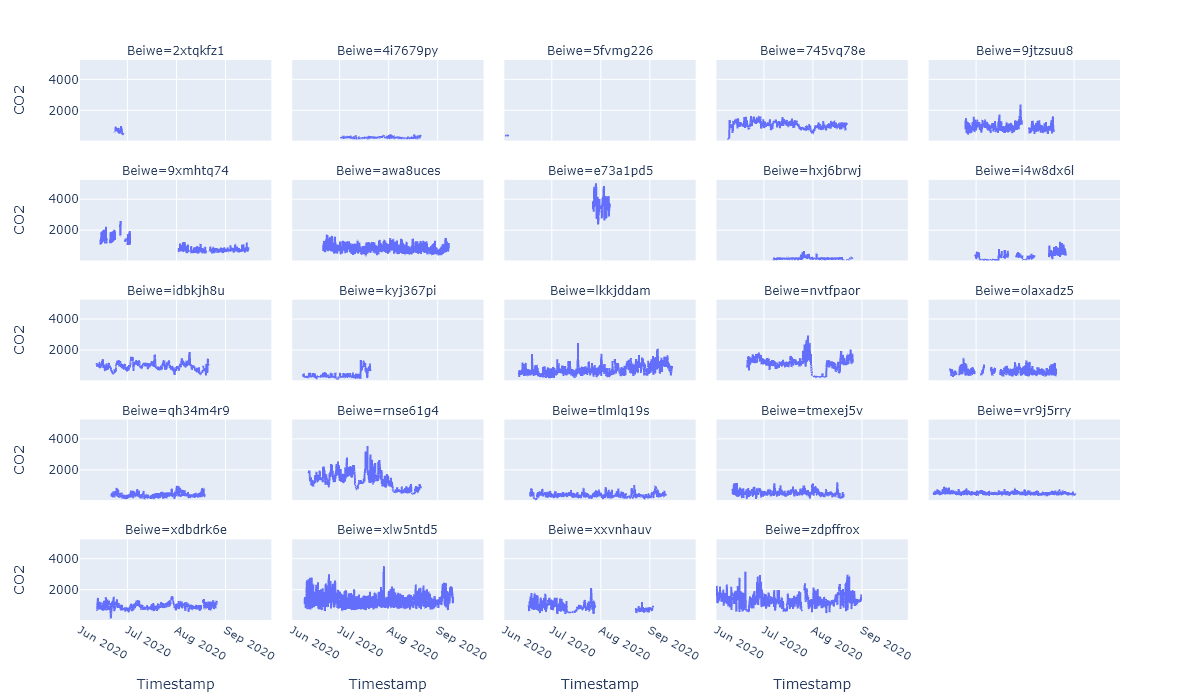

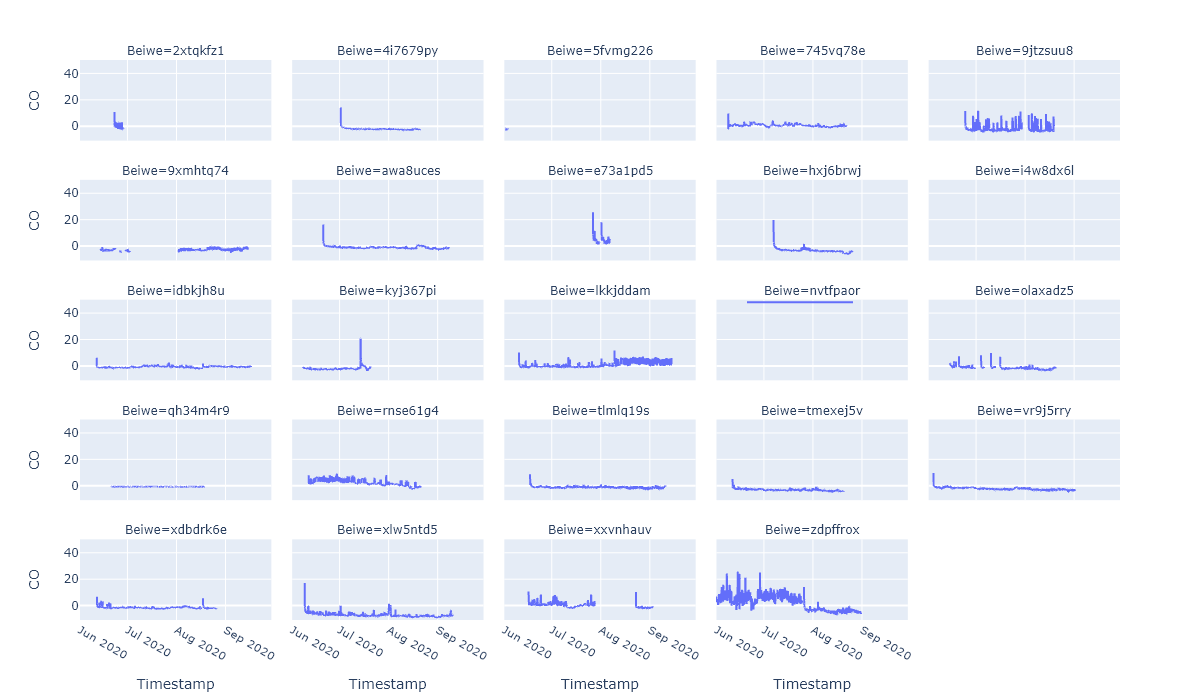

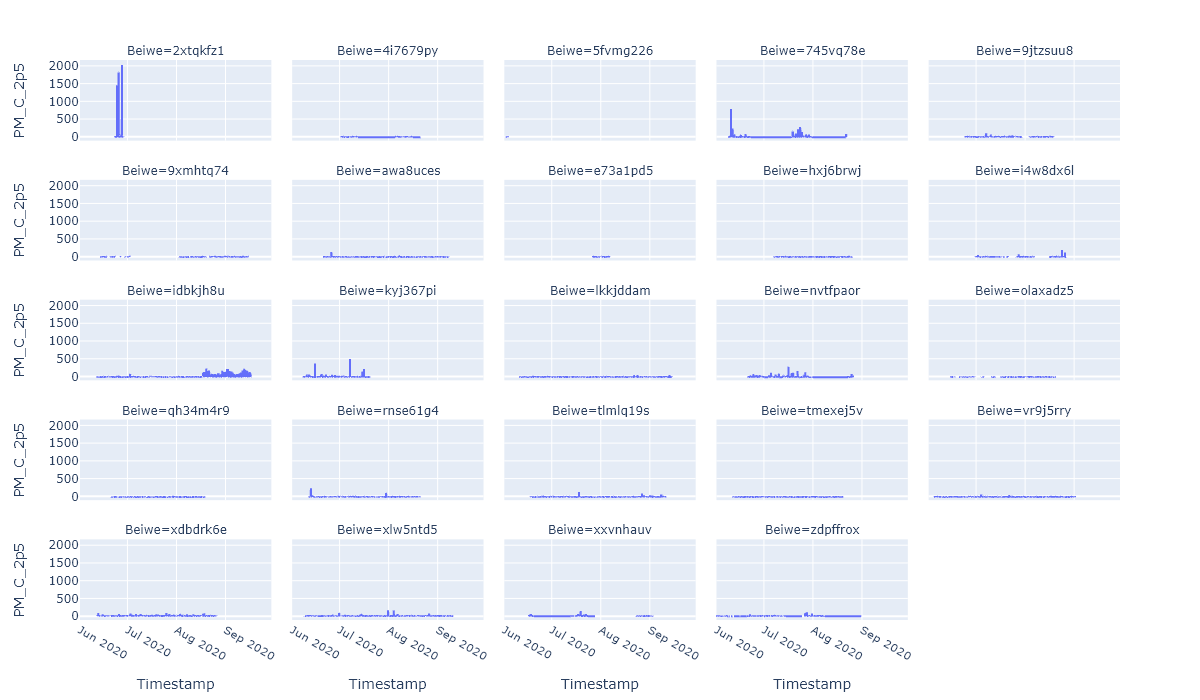

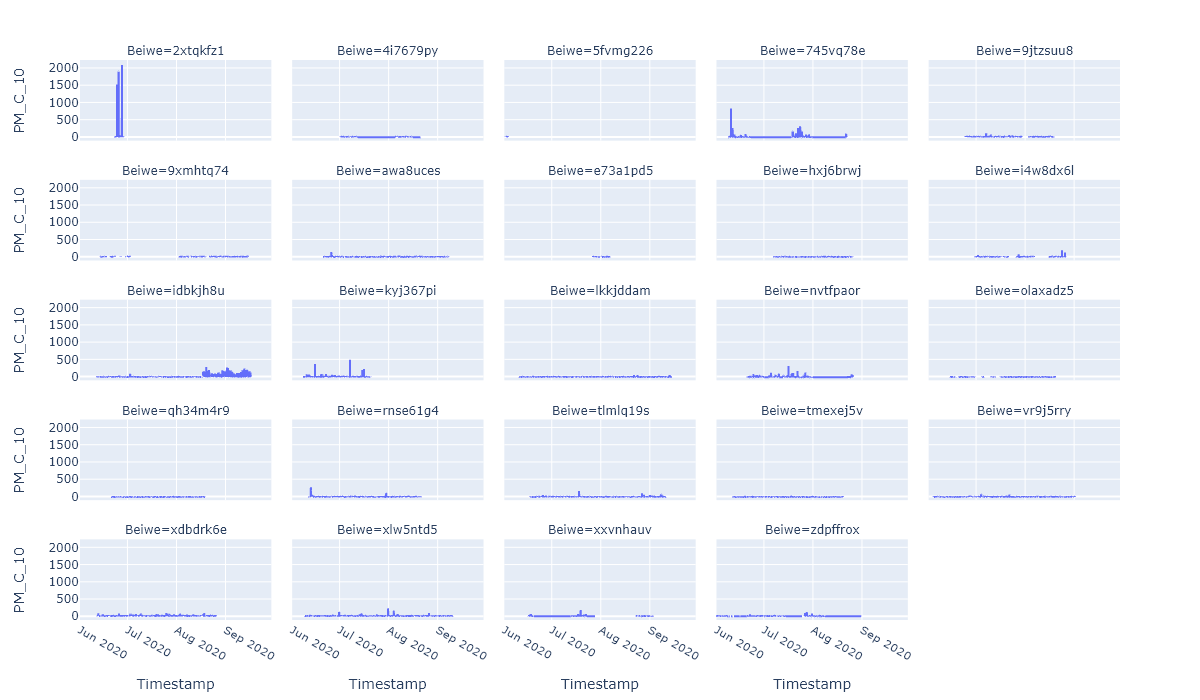

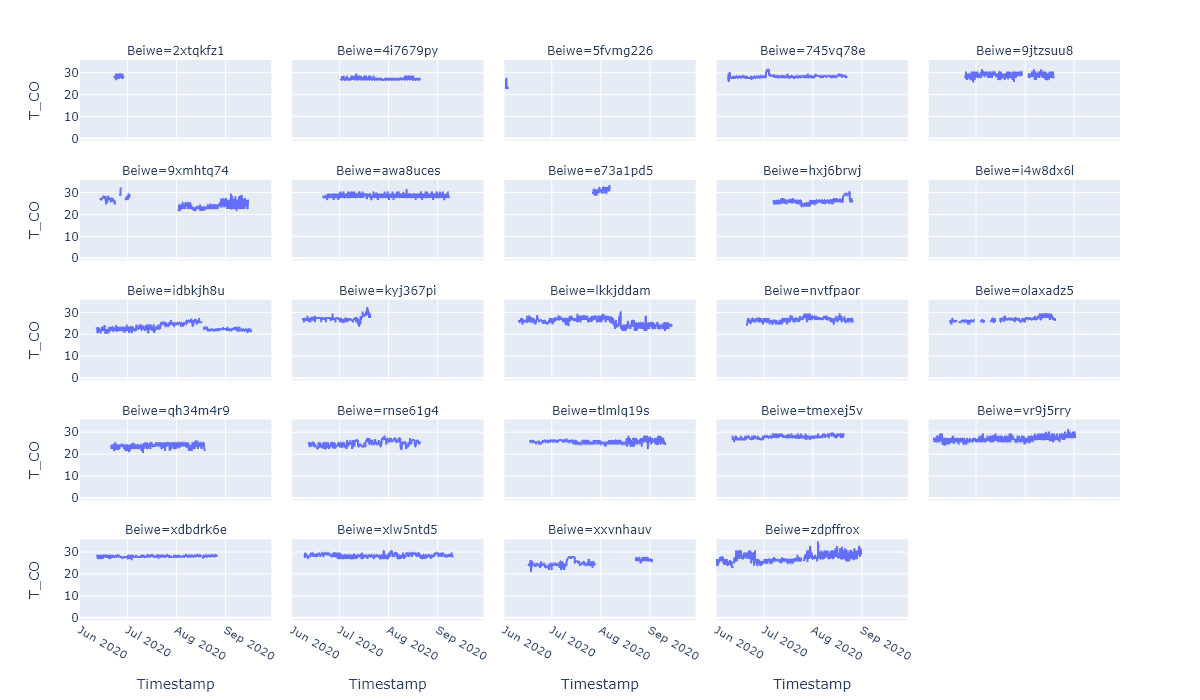

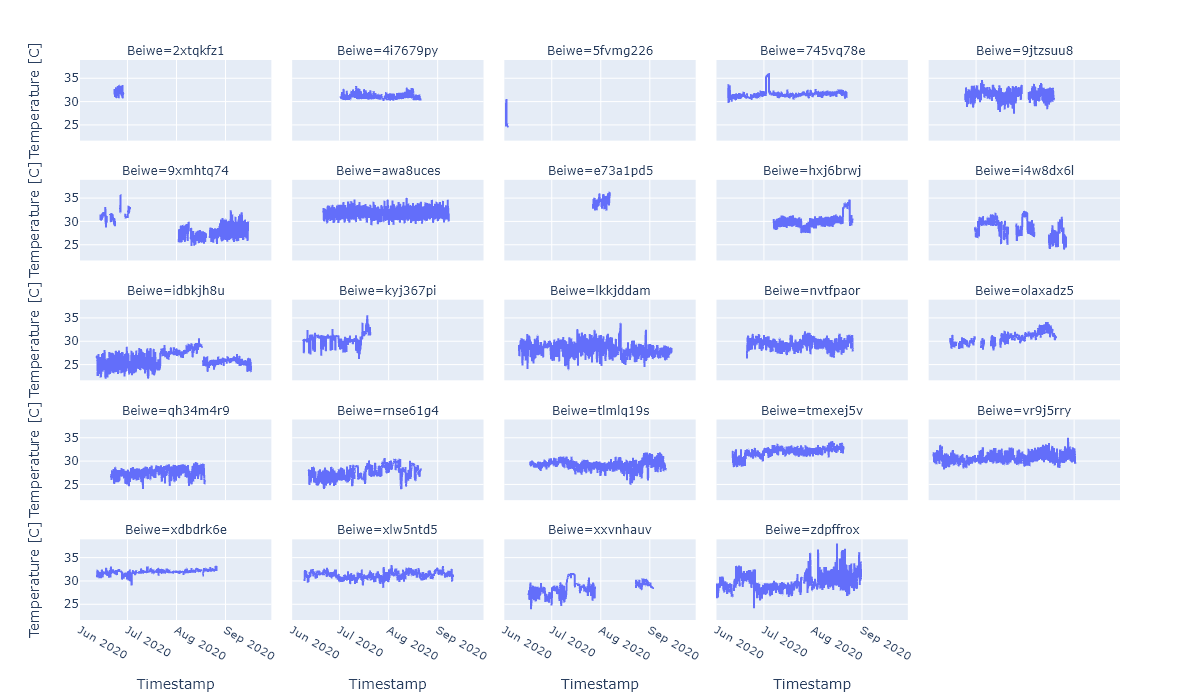

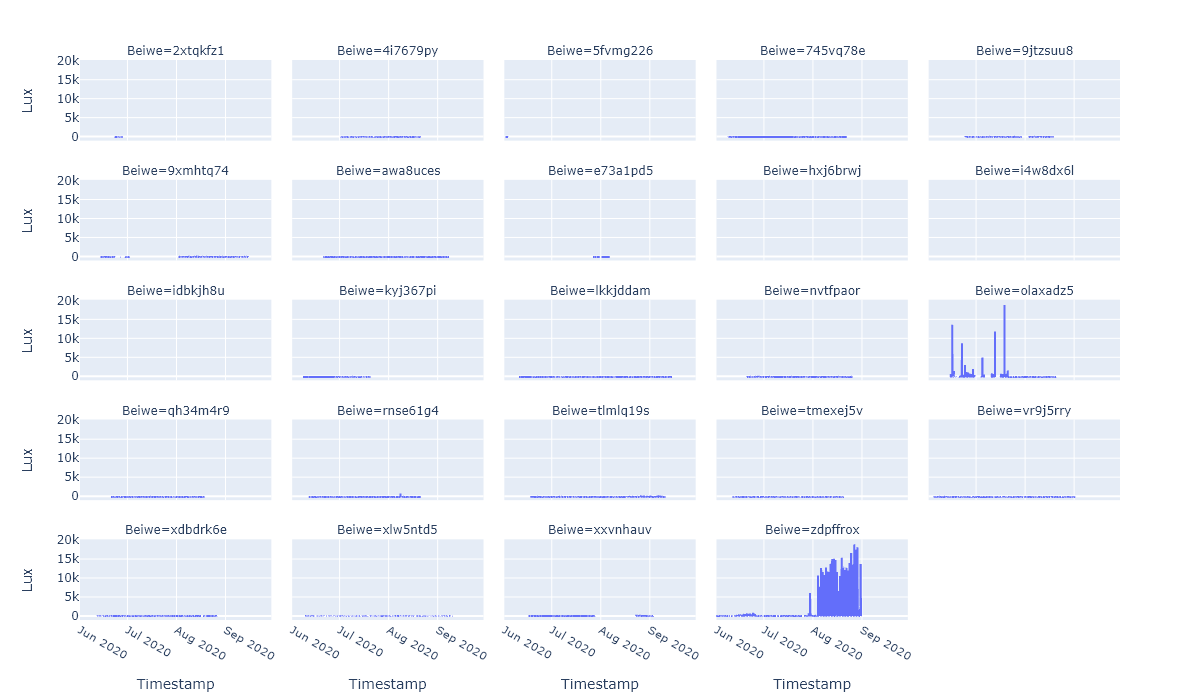

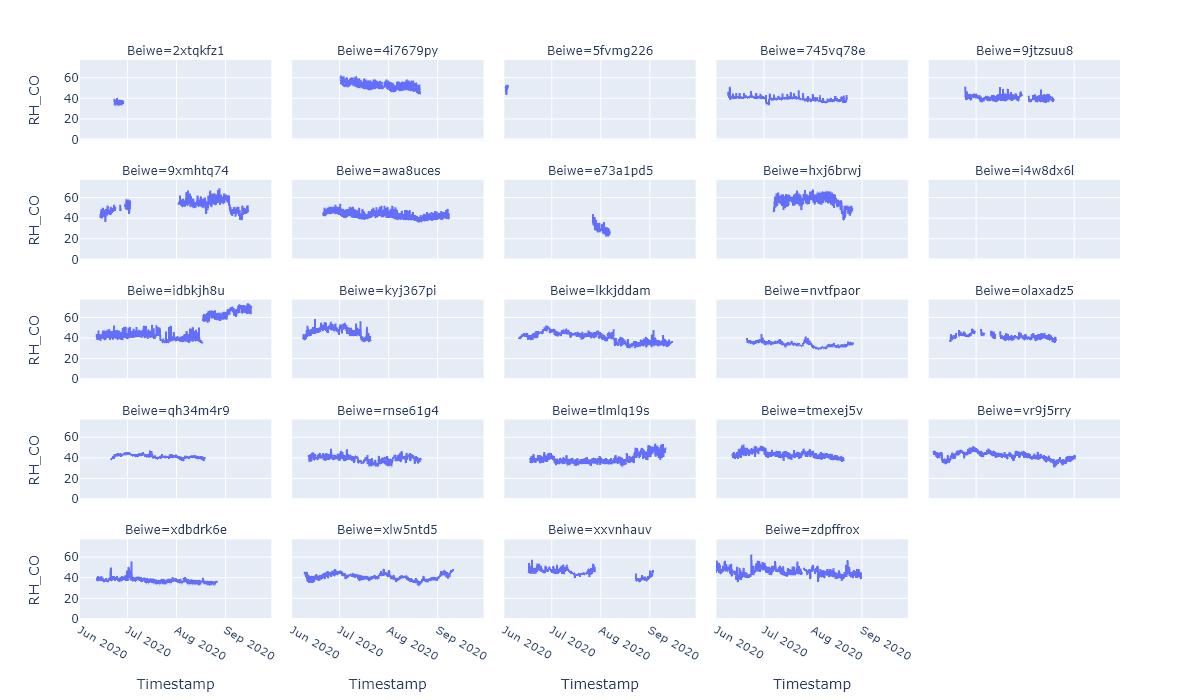

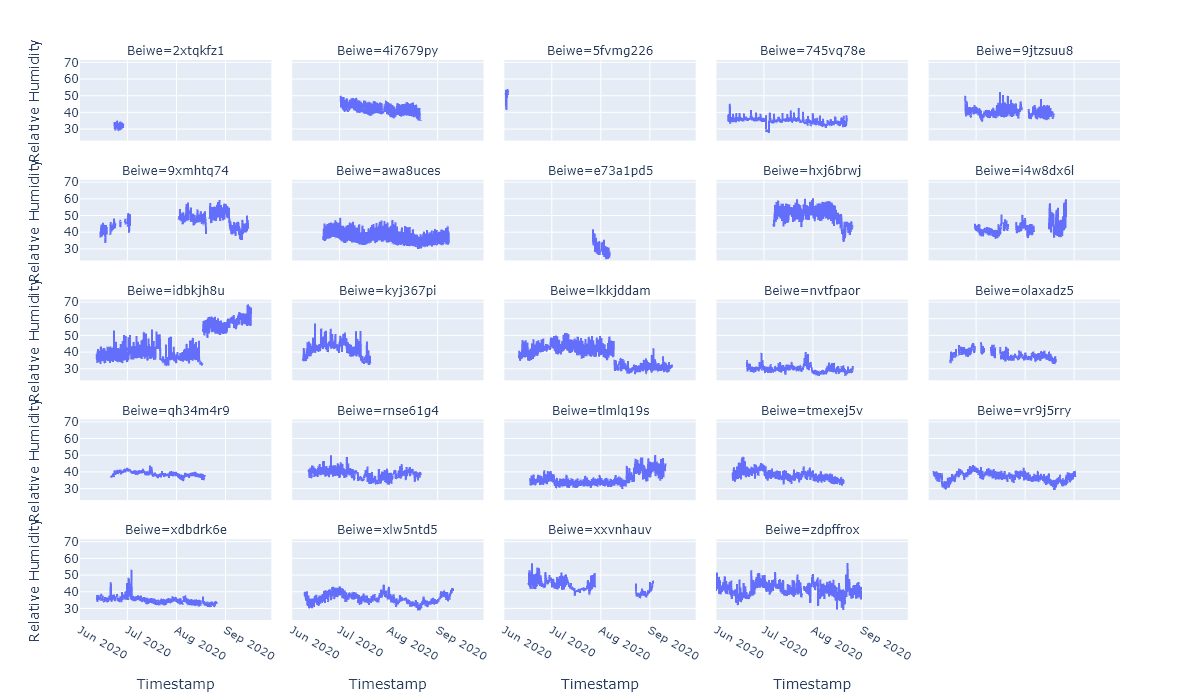

In [57]:
timefacet(median_cleaned_data.reset_index().set_index('Timestamp'))